In [1]:
from scipy.io import arff
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
filename = '../data/data.arff'
filename_csv = '../data/adult.data'

First, we read the arff file:

In [3]:
with open(filename, 'r') as f:
    data, meta = arff.loadarff(f)

print(data[0])
print(meta)

(25., b'Private', 226802., b'11th', 7., b'Never-married', b'Machine-op-inspct', b'Own-child', b'Black', b'Male', 0., 0., 40., b'United-States', b'<=50K')
Dataset: adult
	age's type is numeric
	workclass's type is nominal, range is ('Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked')
	fnlwgt's type is numeric
	education's type is nominal, range is ('Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool')
	education-num's type is numeric
	marital-status's type is nominal, range is ('Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse')
	occupation's type is nominal, range is ('Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farmin

Now, we can perform some basic statistics.
For example, what is the distribution of the class attribute?

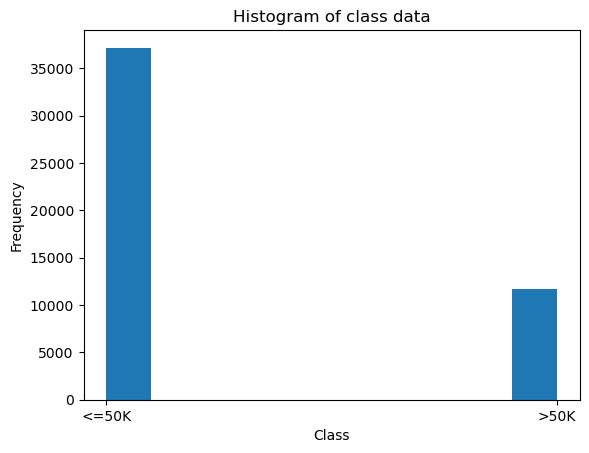

In [4]:
class_data = data['class']

# We can plot a histogram of the class data
plt.hist(class_data)
plt.title('Histogram of class data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

As we can see, it is about 25/75, which is not bad.
We can also see the distribution of different attributes, like the sex, the age and the race:

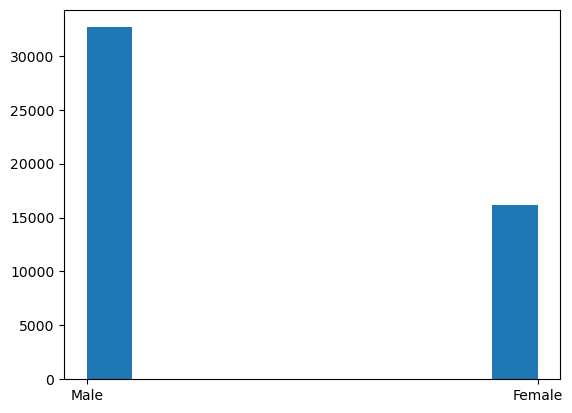

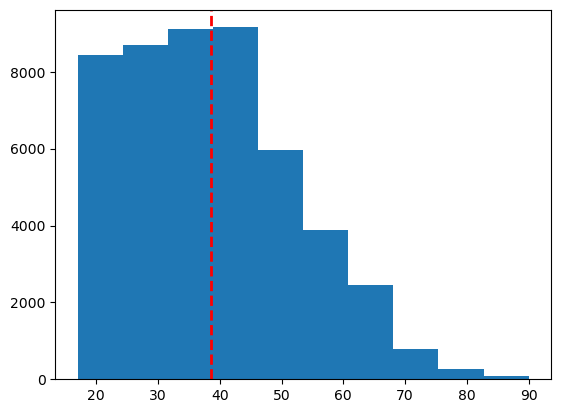

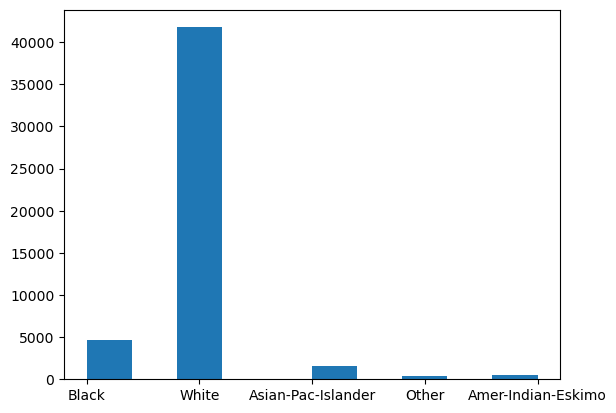

In [5]:
sex = data['sex']
age = data['age']
race = data['race']

# And plot it
plt.hist(sex)
plt.show()

plt.hist(age)
# we plot the average age
plt.axvline(np.mean(age), color='r', linestyle='dashed', linewidth=2)
plt.show()

plt.hist(race)
plt.show()

We can see how the dataset is mainly composed of white-males between 20 and 40 years old. Thus, we can see that the dataset is not balanced, and we will have to take this into account when we train our models. This will be an added challenge to the project.

For instance, an initial assessment that we can do is to see how the income is distributed:

Percentage of white people with salary > 50K:  0.2539868780230832
Percentage of black people with salary > 50K:  0.1208110992529349


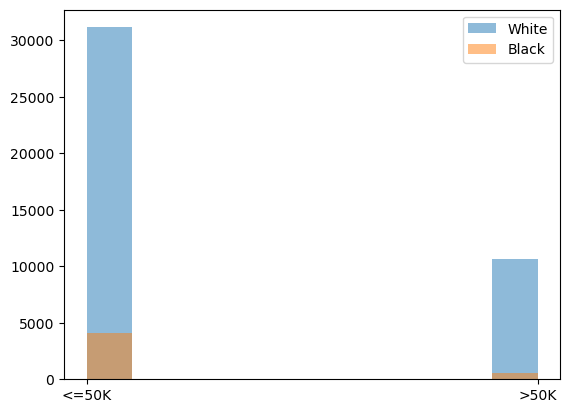

In [6]:
# Let's see how is the salary distribution in white people and black people
white = data[data['race'] == b'White']['class']
black = data[data['race'] == b'Black']['class']

# We can compute the percentage of people with salary > 50K
print('Percentage of white people with salary > 50K: ', np.sum(white == b'>50K') / len(white))
print('Percentage of black people with salary > 50K: ', np.sum(black == b'>50K') / len(black))

# Let's plot both histograms together
plt.hist(white, alpha=0.5, label='White')
plt.hist(black, alpha=0.5, label='Black')
plt.legend(loc='upper right')
plt.show()

Percentage of male people with salary > 50K:  0.3037672281776417
Percentage of female people with salary > 50K:  0.10925148221343874


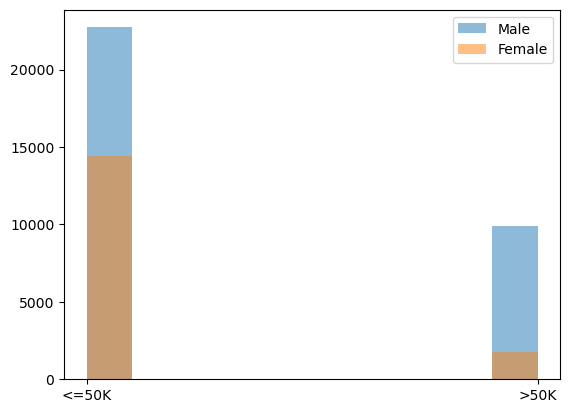

In [8]:
# Let's see how is the salary distribution between sex
male = data[data['sex'] == b'Male']['class']
female = data[data['sex'] == b'Female']['class']

# We can compute the percentage of people with salary > 50K
print('Percentage of male people with salary > 50K: ', np.sum(male == b'>50K') / len(male))
print('Percentage of female people with salary > 50K: ', np.sum(female == b'>50K') / len(female))

# Let's plot both histograms together
plt.hist(male, alpha=0.5, label='Male')
plt.hist(female, alpha=0.5, label='Female')
plt.legend(loc='upper right')
plt.show()

This way, we see how there are significant differences between the distribution of the class attribute in each group. This will ultimately affect our models, and we will try to take measures to reduce the bias, assessing the impact of the measures in the results.

In [7]:
# Remove spaces from the file
with open(filename_csv, 'r') as f:
    lines = f.readlines()
    lines = [line.replace(' ', '') for line in lines]

with open(filename_csv, 'w') as f:
    f.writelines(lines)
    

In [33]:
# We read the csv file, ? are missing values
df = pd.read_csv(filename_csv, header=None, na_values='?',names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class'])

# We can see the first 5 rows
print(df.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  class  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [34]:
# How many rows and columns are there?
print(df.shape)
# How many missing values are there?
print(df.isnull().sum())

(32561, 15)
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64


# Preprocessing

We are going to perform some preprocessing to the dataset, in order to make it more suitable for our models. We will perform the following steps:

1. Inspection of the dataset
2. Data cleaning
3. See equivalence between attributes
4. Explorative analysis
5. Outliers

1. Inspection of the dataset

In [35]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [36]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [37]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64

2. Data cleaning

We can see how workclass and occupation have missing values. We will have to deal with them. Firstly, let's see if they are missing in the same rows (which seems reasonable because the amount of missing values is almost the same): 

In [38]:
filter = df['occupation'].isnull() & df['workclass'].isnull()

df.loc[filter].count()

age               1836
workclass            0
fnlwgt            1836
education         1836
education-num     1836
marital-status    1836
occupation           0
relationship      1836
race              1836
sex               1836
capital-gain      1836
capital-loss      1836
hours-per-week    1836
native-country    1809
class             1836
dtype: int64

This means that all instances without workclass also have missing occupation. We will have to deal with this. We have to further inspect these columns, because maybe they are telling us the same information.

In [39]:
# 1. We get all possible pairs of values for the occupation and workclass
# 2. We group by occupation and workclass
# 3. We see if the mapping is unique
print(df.groupby(['occupation', 'workclass']).size().reset_index().rename(columns={0:'count'}))
print(df.groupby(['workclass','occupation']).size().reset_index().rename(columns={0:'count'}))

          occupation         workclass  count
0       Adm-clerical       Federal-gov    317
1       Adm-clerical         Local-gov    283
2       Adm-clerical           Private   2833
3       Adm-clerical      Self-emp-inc     31
4       Adm-clerical  Self-emp-not-inc     50
..               ...               ...    ...
76  Transport-moving           Private   1266
77  Transport-moving      Self-emp-inc     27
78  Transport-moving  Self-emp-not-inc    122
79  Transport-moving         State-gov     41
80  Transport-moving       Without-pay      1

[81 rows x 3 columns]
      workclass         occupation  count
0   Federal-gov       Adm-clerical    317
1   Federal-gov       Armed-Forces      9
2   Federal-gov       Craft-repair     64
3   Federal-gov    Exec-managerial    180
4   Federal-gov    Farming-fishing      8
..          ...                ...    ...
76  Without-pay    Farming-fishing      6
77  Without-pay  Handlers-cleaners      1
78  Without-pay  Machine-op-inspct      1
79  W

We can see that the mapping is not unique, so both attributes are informative. We will have to deal with the missing values somehow. For now, let's just drop this rows (only 5%). #TODO: try to impute the missing values

In [40]:
#drop the rows with workclass or occupation missing
df = df.dropna(subset=['occupation', 'workclass'])
df.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    556
class               0
dtype: int64

We still have plenty of null values in the native-country column. For now, we will just drop this column, because we don't have enough information to fill the missing values.

In [41]:
df = df.dropna(subset=['native-country'])
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

Now, we can see that the dataset is clean, and we can start to preprocess it.

3. Are the columns 'education' and 'education-num' redundant?

In [42]:
print(df.groupby(['education', 'education-num']).size().reset_index().rename(columns={0:'count'}))

       education  education-num  count
0           10th              6    820
1           11th              7   1048
2           12th              8    377
3        1st-4th              2    151
4        5th-6th              3    288
5        7th-8th              4    557
6            9th              5    455
7     Assoc-acdm             12   1008
8      Assoc-voc             11   1307
9      Bachelors             13   5044
10     Doctorate             16    375
11       HS-grad              9   9840
12       Masters             14   1627
13     Preschool              1     45
14   Prof-school             15    542
15  Some-college             10   6678


Indeed, the column 'education-num' is a numerical representation of the column 'education'. As we can see, the numerical representation introduces a notion of order in the categories. We have seen that this can be problematic, but in this case, the order could be meaningful. For example, a person with a master degree is more likely to have a higher income than a person with a high school degree. 

Therefore, we will keep both columns, and we will try to see if the numerical representation is useful for our models, or if we should just use the categorical representation or a one-hot encoding.

4. Explorative analysis

We are going to start by plotting the distribution of the income for each category of the categorical attributes. We will start with the age:

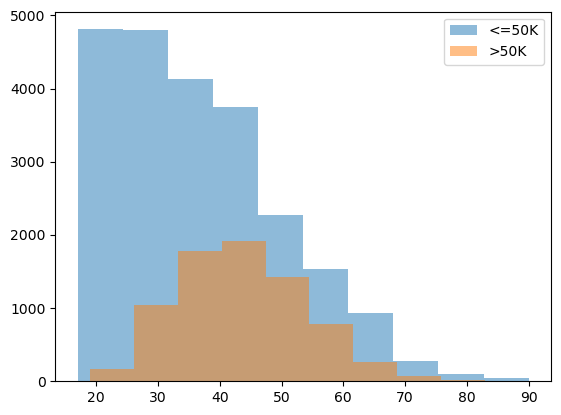

In [43]:
plt.hist(df[df['class'] == '<=50K']['age'], alpha=0.5, label='<=50K')
plt.hist(df[df['class'] == '>50K']['age'], alpha=0.5, label='>50K')
plt.legend(loc='upper right')
plt.show()

Observations:
- There are less people with income >50K, but this distribution follows a somewhat normal distribution centered in the 40s.
- The <=50K distribution is more skewed to the left, and it is more concentrated in the 20s and 30s.

Let's now see what happens with the education:

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']


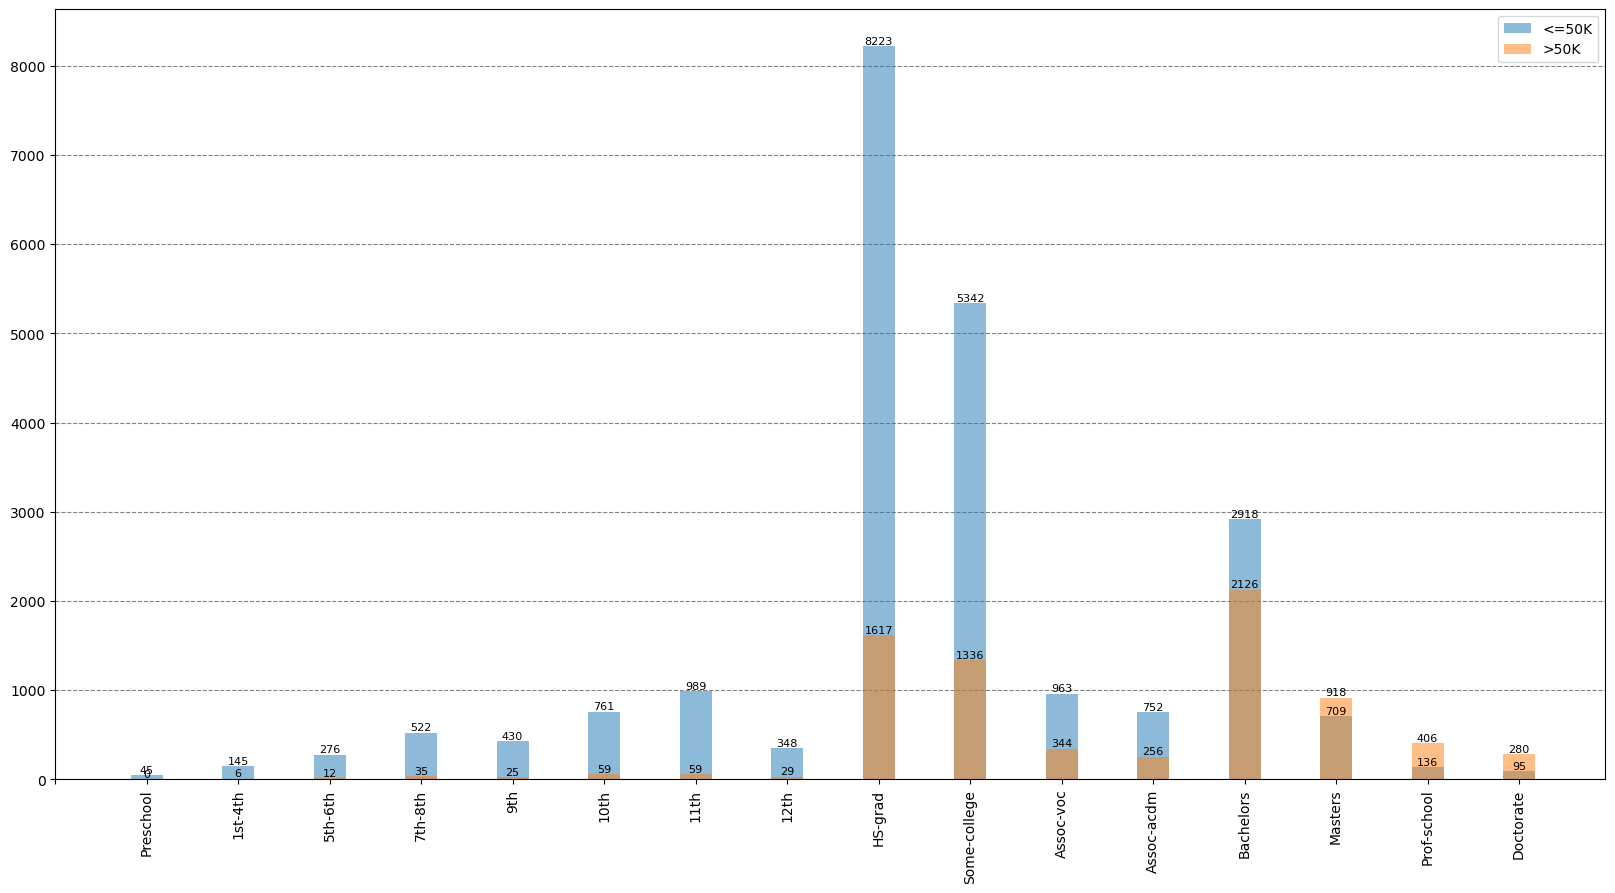

In [112]:
#plot the class against the education, for each education we plot the frequency of each class
plt.figure(figsize=(20,10))
labels = df['education-num'].unique()
#sort the labels
labels.sort()
#get the correspondent education to each education-num
labels2 = [df[df['education-num'] == label]['education'].iloc[0] for label in labels]
print(labels)
print(labels2)
bin_edges = np.arange(len(labels)+1) + 0.5
bar_width = 0.35
plt.hist(df[df['class'] == '<=50K']['education-num'], alpha=0.5, label='<=50K', bins=bin_edges, align='mid', rwidth=bar_width)
plt.hist(df[df['class'] == '>50K']['education-num'], alpha=0.5, label='>50K', bins=bin_edges,align='mid', rwidth=bar_width)
plt.legend(loc='upper right')
#rotate the labels and change the numbers to the correspondent education
plt.xticks(range(len(labels2)+1), ['']+labels2, rotation='vertical')
#separate the bars
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(color='gray', linestyle='dashed')
#plot the values of each bar
for i, v in enumerate(plt.gca().patches):
    plt.gca().text(v.get_x() + v.get_width()/2., v.get_height(), str(int(v.get_height())), fontsize=8, color='black', ha='center', va='bottom')
plt.show()

Anyways, let's see what happens with the marital-status:

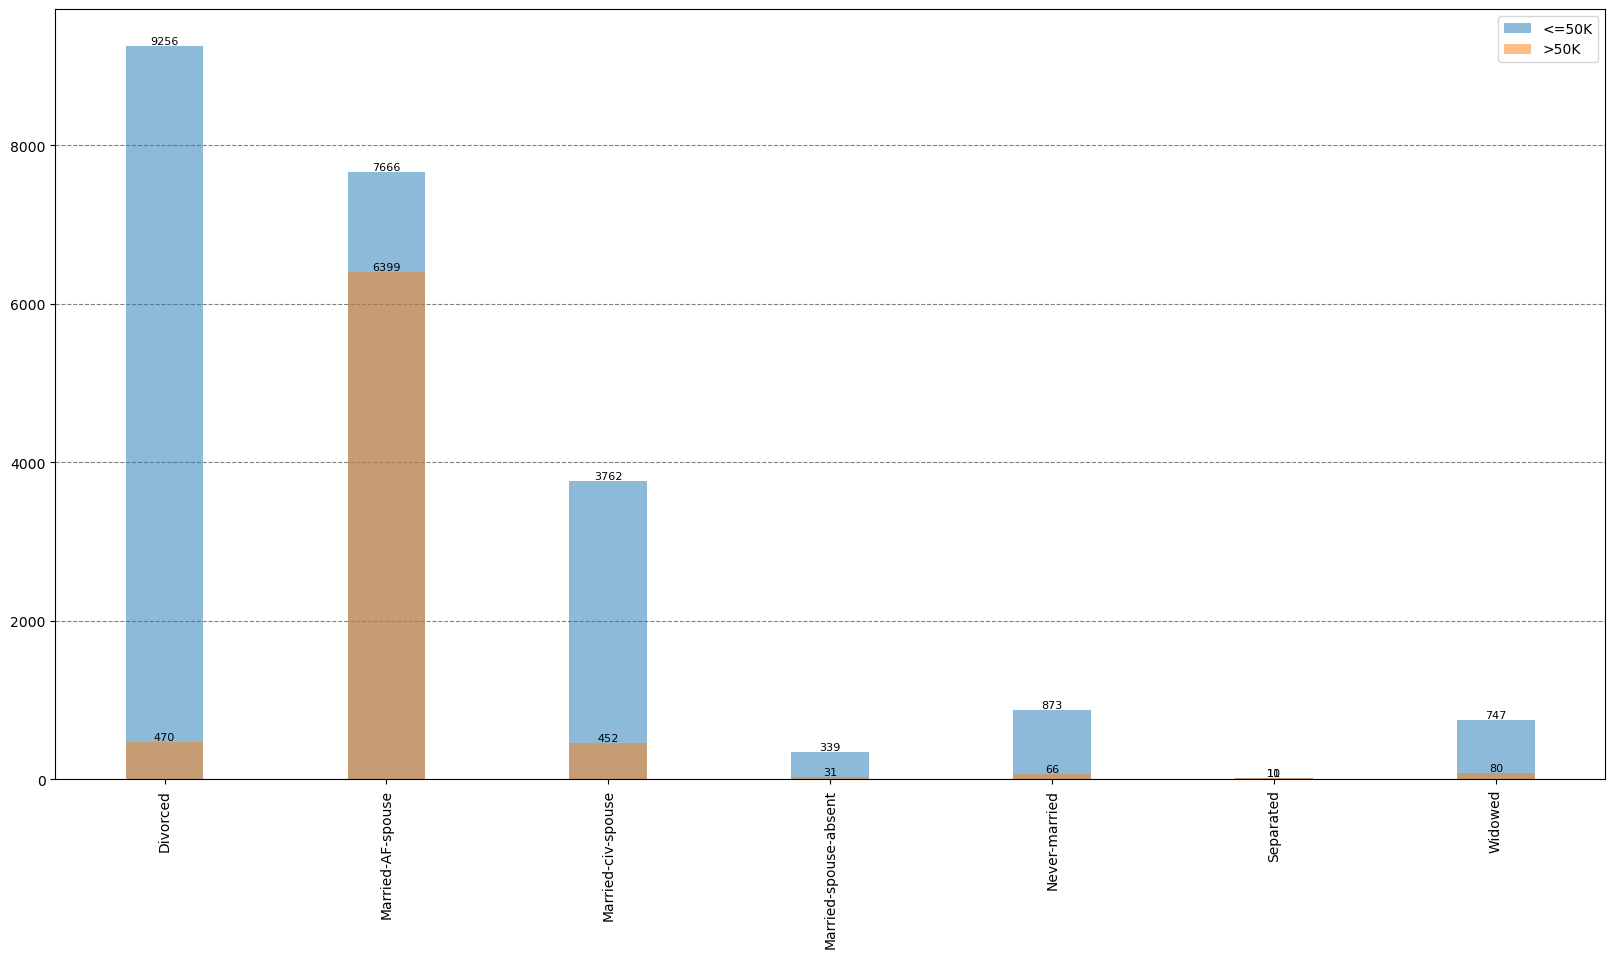

In [ ]:
#plot the class against the marital-status, for each marital-status we plot the frequency of each class
plt.figure(figsize=(20,10))
labels = df['marital-status'].unique()
#sort the labels
labels.sort()
bin_edges = np.arange(len(labels)+1) - 0.5
bar_width = 0.35
plt.hist(df[df['class'] == '<=50K']['marital-status'], alpha=0.5, label='<=50K', bins=bin_edges, align='mid', rwidth=bar_width)
plt.hist(df[df['class'] == '>50K']['marital-status'], alpha=0.5, label='>50K', bins=bin_edges,align='mid', rwidth=bar_width)
plt.legend(loc='upper right')
#rotate the labels and change the numbers to the correspondent education
plt.xticks(range(len(labels)), labels, rotation='vertical')
#separate the bars
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(color='gray', linestyle='dashed')
#plot the values of each bar
for i, v in enumerate(plt.gca().patches):
    plt.gca().text(v.get_x() + v.get_width()/2., v.get_height(), str(int(v.get_height())), fontsize=8, color='black', ha='center', va='bottom')
plt.show()


All classes are quite skewed towards <=50K, except for the Married-af-spouse class. This is interesting, because it means that people who are married are more likely to have a higher income. This is probably because married people are more likely to have a stable job, and thus, a higher income.

Of course, the occupation is also important:

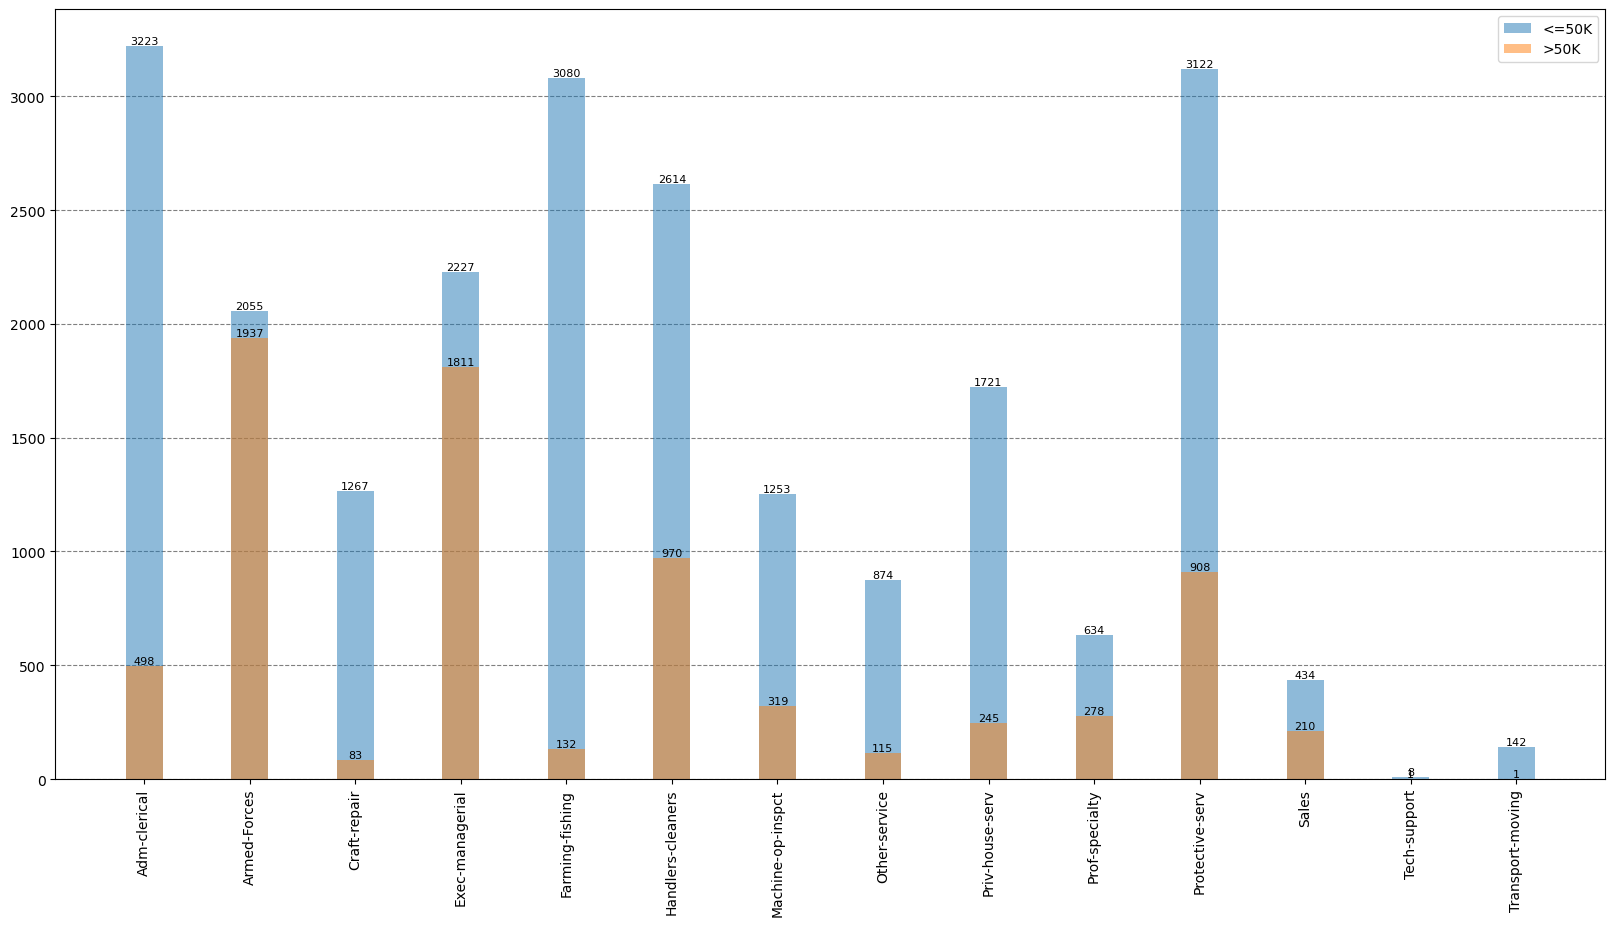

In [46]:
#plot the class against the occupation, for each occupation we plot the frequency of each class
plt.figure(figsize=(20,10))
labels = df['occupation'].unique()
#sort the labels
labels.sort()
bin_edges = np.arange(len(labels)+1) - 0.5
bar_width = 0.35
plt.hist(df[df['class'] == '<=50K']['occupation'], alpha=0.5, label='<=50K', bins=bin_edges, align='mid', rwidth=bar_width)
plt.hist(df[df['class'] == '>50K']['occupation'], alpha=0.5, label='>50K', bins=bin_edges,align='mid', rwidth=bar_width)
plt.legend(loc='upper right')
#rotate the labels and change the numbers to the correspondent education
plt.xticks(range(len(labels)), labels, rotation='vertical')
#separate the bars 
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(color='gray', linestyle='dashed')
#plot the values of each bar
for i, v in enumerate(plt.gca().patches):
    plt.gca().text(v.get_x() + v.get_width()/2., v.get_height(), str(int(v.get_height())), fontsize=8, color='black', ha='center', va='bottom')
plt.show()

As we can see, in most jobs, most people have a <=50K income. However, there are some exceptions, like Exec-managerial and armed forces. This is interesting, because it means that some jobs are more likely to have a higher income.

Now, we can assess if the numerical variables that we have are related between them. For this, we are going to plot a correlation matrix:

/tmp/ipykernel_8051/546123972.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(['education-num'], axis=1).corr()


<AxesSubplot:>

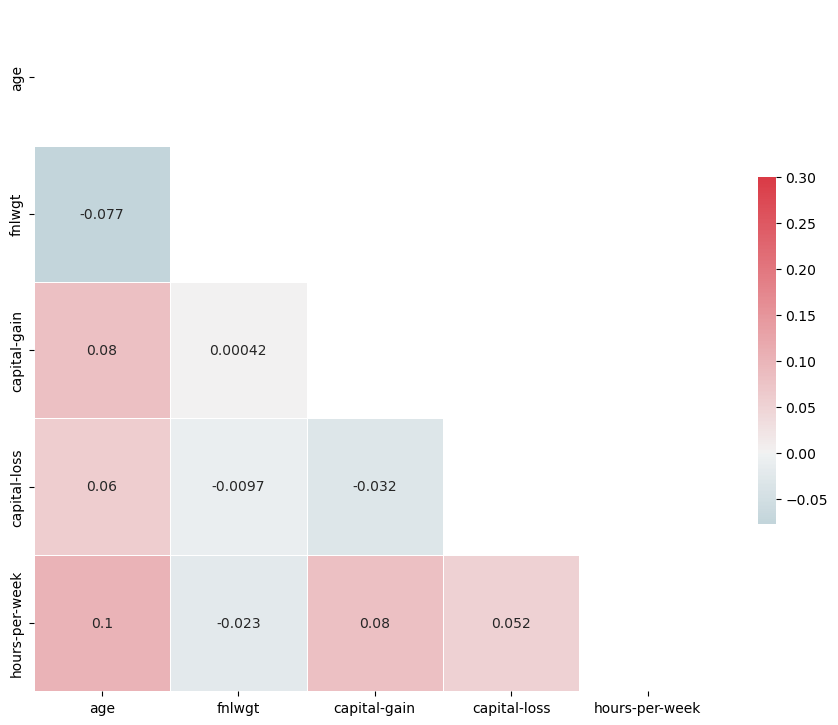

In [47]:
# Correlation matrix of the numerical features, except education-num
corr = df.drop(['education-num'], axis=1).corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw also the values of the correlation
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

We observe that the maximum correlation is 0.08, which is very low. This means that numerical variables are not highly correlated, and we can keep them all, because they are all informative by themselves.

On the other hand, the variable fnlwgt is not correlated with any other variable, and it is in fact a weight assigned for sampling, so it is not related with the income. Therefore, we can drop this column.

In [48]:
df = df.drop(['fnlwgt'], axis=1)

Let's now see how these numerical variables are distributed:

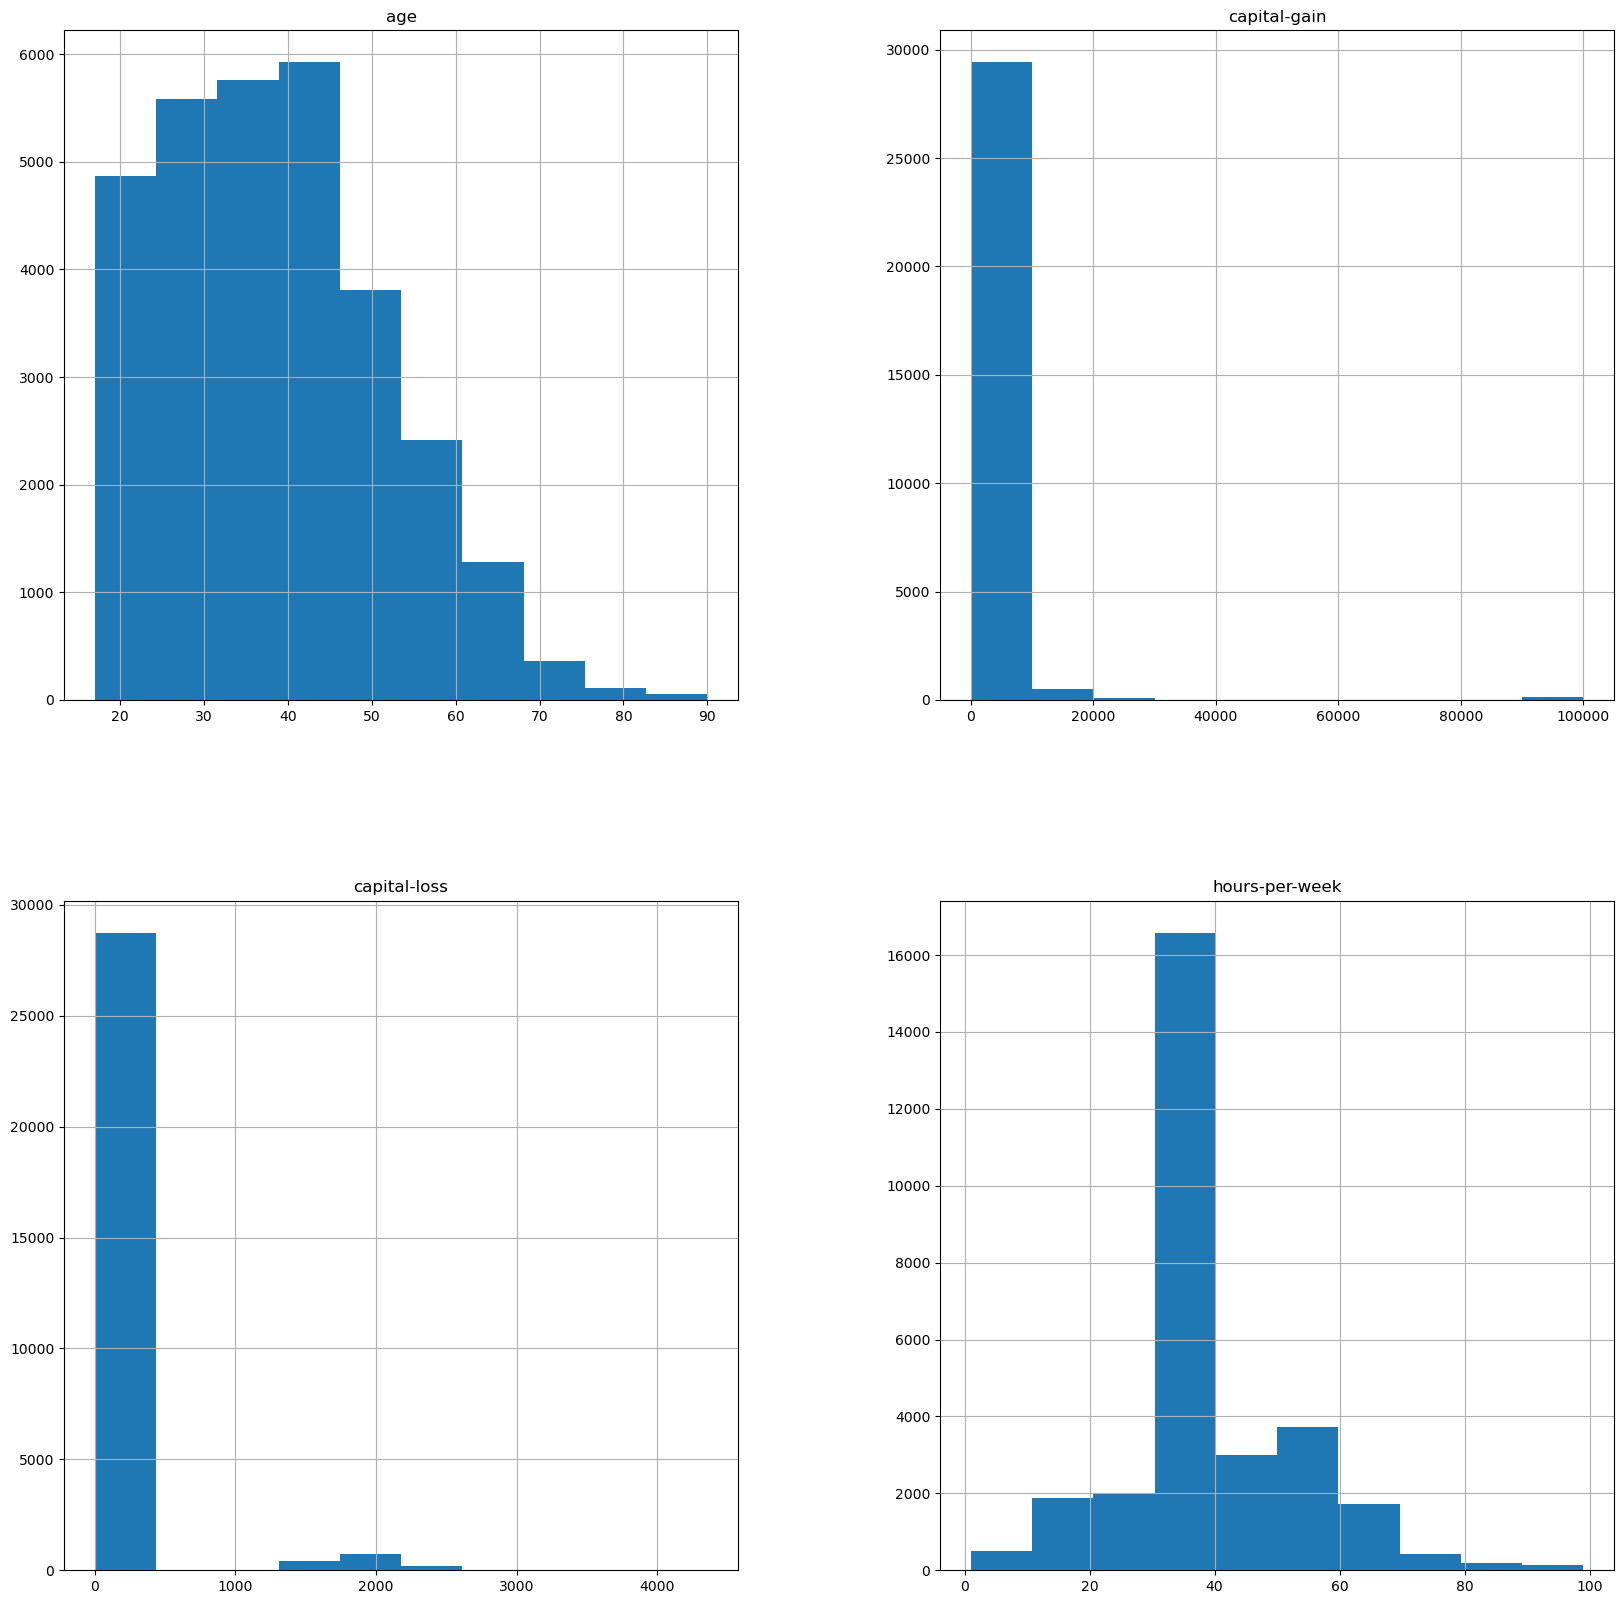

In [49]:
# Plot the distribution of the numerical features, except education-num
df.drop(['education-num'], axis=1).hist(figsize=(20,20))
plt.show()

Capital-gain and capital-loss are highly skewed, we have to take a deeper look at them.

       capital-gain  capital-loss
count  30162.000000  30162.000000
mean    1092.007858     88.372489
std     7406.346497    404.298370
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max    99999.000000   4356.000000


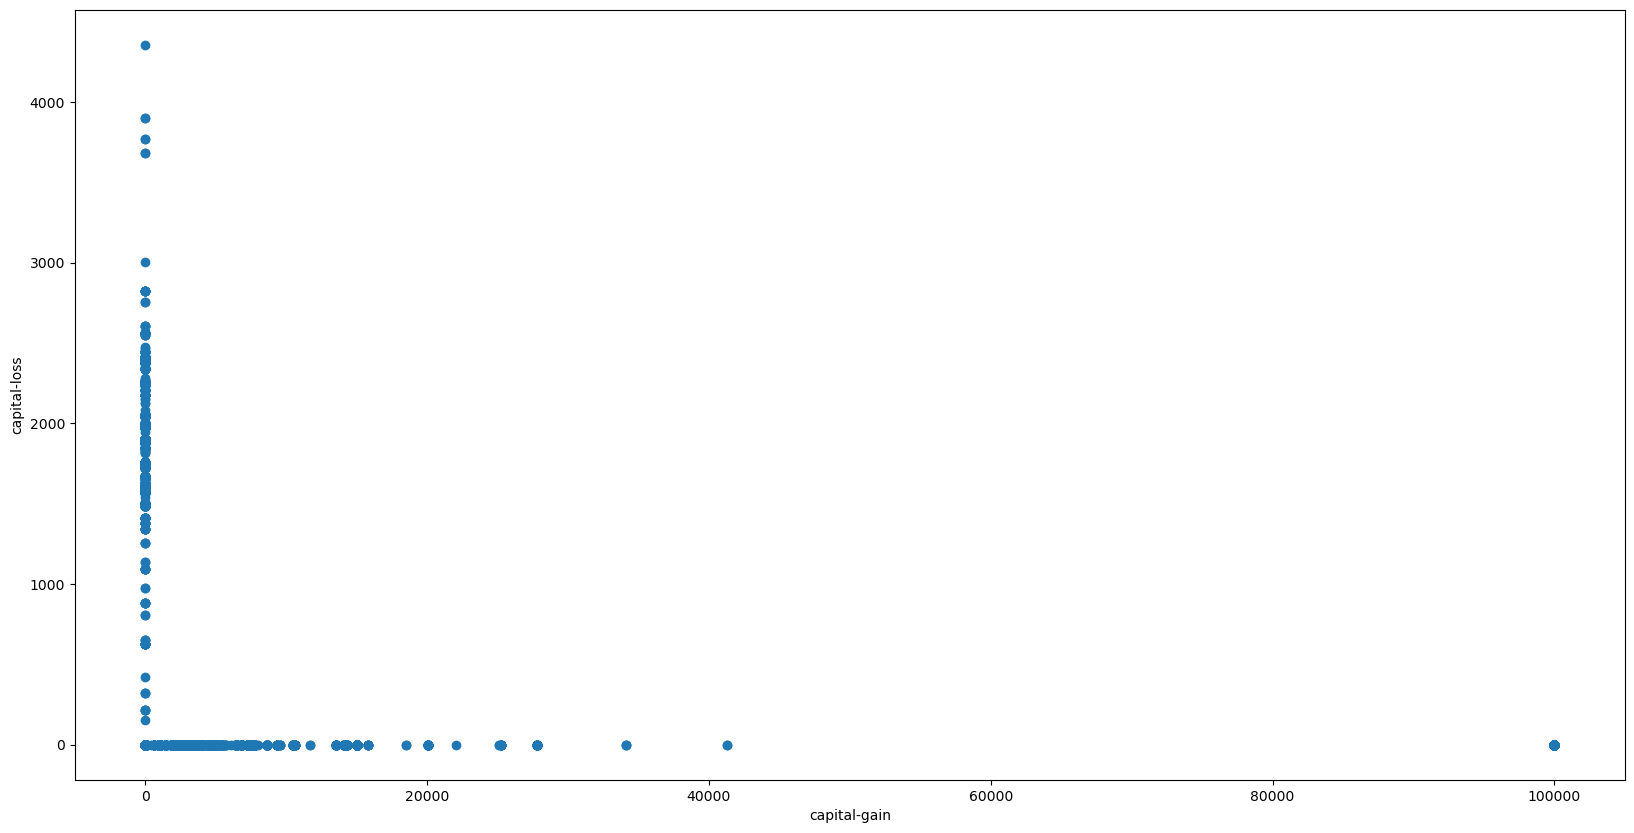

In [50]:
# Statistical description of capital-gain and capital-loss
print(df[['capital-gain', 'capital-loss']].describe())

# Let's plot the capital-gain and capital-loss one against the other
plt.figure(figsize=(20,10))
plt.scatter(df['capital-gain'], df['capital-loss'])
plt.xlabel('capital-gain')
plt.ylabel('capital-loss')
plt.show()


This is very interesting: whenever capital-gain is greater than 0, then capital-loss is 0, and the opposite is also true.

One approach to this is to create a new variable that is the difference between capital-gain and capital-loss. This way, we will have a single variable that represents the net capital gain/loss. We will try this approach, and we will see if it improves the results. 

Pros:
- Simplification: Combining the two variables into one can simplify the data analysis process and make it easier to understand the relationship between the two variables.
- Fewer variables: Having fewer variables can be beneficial when working with large datasets or when trying to avoid overfitting in a model.

Cons:
- Loss of information: By combining the two variables, you lose information about the magnitude and direction of the individual variables. This can make it more difficult to understand the relationship between the variables.
- Skewed data: If the individual variables have different ranges or distributions, combining them into a single variable can skew the data and make it more difficult to analyze.

In [51]:
# We create the new feature capital-diff
df['capital-diff'] = df['capital-gain'] - df['capital-loss']

# If we were right, the absolute value of capital-diff should be equal to the sum of capital-gain and capital-loss
(df['capital-diff'].abs() == df['capital-gain'] + df['capital-loss']).all()

True

In [52]:
df['capital-diff'].describe(percentiles=[0.01,0.05,0.1,0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    30162.000000
mean      1003.635369
std       7430.372730
min      -4356.000000
1%       -1980.000000
5%           0.000000
10%          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          0.000000
95%       5013.000000
99%      15024.000000
max      99999.000000
Name: capital-diff, dtype: float64

In [119]:
# Remove the maximum value of capital-diff
df = df[df['capital-diff'] != df['capital-diff'].max()]

df['capital-diff'].describe(percentiles=[0.01,0.05,0.1,0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    30014.000000
mean       515.486040
std       2630.259258
min      -4356.000000
1%       -1980.000000
5%           0.000000
10%          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          0.000000
95%       4650.000000
99%      15024.000000
max      41310.000000
Name: capital-diff, dtype: float64

We can see how this variable is actually present in very few instances, maybe it would be better to transform it into a categorical variable, with 3 categories: positive, negative and zero.

/tmp/ipykernel_8051/1557157887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['capital-diff_categorical'] = pd.cut(df['capital-diff'], bins=[-100000,-0.001,0.001,100000], labels=['negative', 'zero', 'positive'])


<AxesSubplot:>

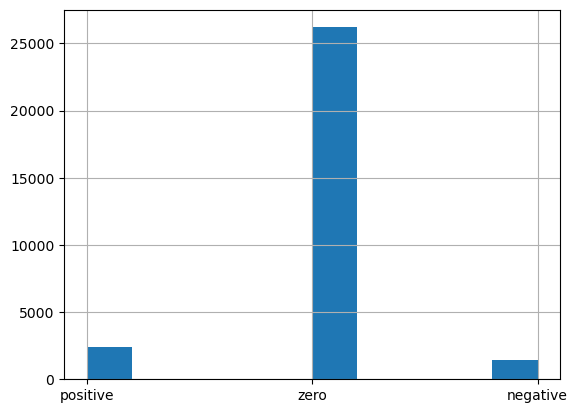

In [120]:
df['capital-diff_categorical'] = pd.cut(df['capital-diff'], bins=[-100000,-0.001,0.001,100000], labels=['negative', 'zero', 'positive'])

# Plot the distribution of the new feature capital-diff
df['capital-diff_categorical'].hist()

5. Outliers

As can be observed in the histograms, there are some outliers in the numerical variables. We will try to remove them, and we will see if it improves the results.

In [121]:
# We remove values outside the range of the 1.5 times the interquartile range for each numerical feature
# We do not remove outliers for the education-num feature nor age
numerical_features = ['capital-gain', 'capital-loss', 'hours-per-week', 'capital-diff']
for feature in numerical_features:
    print('Feature: {}'.format(feature))
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    print('IQR: {}'.format(iqr))
    df_no_outliers = df[(df[feature] >= q1 - 1.5*iqr) & (df[feature] <= q3 + 1.5*iqr)]

Feature: capital-gain
IQR: 0.0
Feature: capital-loss
IQR: 0.0
Feature: hours-per-week
IQR: 5.0
Feature: capital-diff
IQR: 0.0


In [122]:
df_no_outliers['hours-per-week'].describe()

count    26197.000000
mean        40.490438
std         11.942719
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

count    25333.000000
mean        39.332018
std         10.158787
min          1.000000
25%         40.000000
50%         40.000000
75%         43.000000
max         60.000000
Name: hours-per-week, dtype: float64

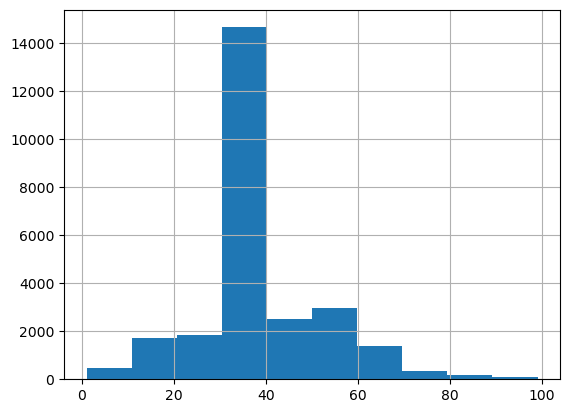

In [123]:
# Plot the distribution of hours-per-week
df_no_outliers['hours-per-week'].hist()

# drop the max value of hours-per-week
while df_no_outliers['hours-per-week'].max() > 60:
    df_no_outliers = df_no_outliers[df_no_outliers['hours-per-week'] != df_no_outliers['hours-per-week'].max()]
df_no_outliers['hours-per-week'].describe()

<AxesSubplot:>

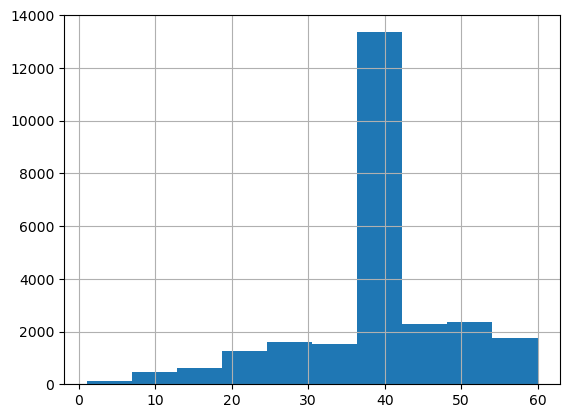

In [124]:
df_no_outliers['hours-per-week'].hist()

Now, we have done quite a lot of preprocessing, and we can start to train our models and see how they perform.

For this, we will take several final datasets composed by:

#TODOs:
- Add cross-validation
- Neural networks preprocessing
- Compare all models in a single plot
- Add confusion matrices
- Add threshold bias awareness/fairness for logistic regression

Data set 1:
- The numerical variables except fnlwgt, capital-gain and capital-loss
- The categorical variables plus the capital-diff_categorical variable
- Education expressed using the numerical representation
- No missing values
- No outliers 

Data set 2:
- The numerical variables except fnlwgt, capital-gain and capital-loss
- The categorical variables plus the capital-diff_categorical variable
- Education expressed using the naming representation
- No missing values
- No outliers

Data set 3:
- The numerical variables except fnlwgt, capital-gain and capital-loss
- The categorical variables plus the capital-diff_categorical variable
- Education expressed using the naming representation in a one-hot encoding
- No missing values
- No outliers

In [125]:
df1 = df_no_outliers.drop(['capital-gain', 'capital-loss', 'capital-diff', 'education'], axis=1)
df1.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,class,capital-diff_categorical
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,zero
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,zero
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,zero
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,zero
5,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K,zero


In [126]:
df2 = df_no_outliers.drop(['capital-gain', 'capital-loss', 'capital-diff', 'education-num'], axis=1)
df2.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,class,capital-diff_categorical
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,zero
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,zero
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,zero
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,zero
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K,zero


In [127]:
# df3 is just df2 with the categorical features encoded except for the class
df3 = pd.get_dummies(df2.drop(['class'], axis=1))
df3['class'] = df2['class']
df3.head()

,age,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,capital-diff_categorical_negative,capital-diff_categorical_zero,capital-diff_categorical_positive,class
1,50,13,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,<=50K
2,38,40,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,<=50K
3,53,40,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,<=50K
4,28,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,<=50K
5,37,40,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,<=50K


EXPERIMENTAL: let's see the entropy of the categorical variables:

In [134]:
from scipy.stats import entropy

In [144]:
# entropy of the class for each categorical feature
feat_entropy = {}

for feature in df.columns:
    if feature != 'class':
        # Compute entropy for each unique value of the feature
        entropies = df.groupby(feature)['class'].apply(lambda x: entropy(x.value_counts(normalize=True), base=2))
        # Compute weighted average of entropies
        #weights = df[feature].value_counts(normalize=True)
        feat_entropy[feature] = sum(entropies)
feat_entropy

{'age': 48.89802974956596,
 'workclass': 5.27306775260837,
 'education': 8.850114255777324,
 'education-num': 8.850114255777324,
 'marital-status': 3.9715230994143234,
 'occupation': 8.875654616223002,
 'relationship': 3.1674306159057357,
 'race': 3.1609000284009463,
 'sex': 1.3981036517885945,
 'capital-gain': 1.7358367907613224,
 'capital-loss': 6.006693915470294,
 'hours-per-week': 54.77624254360021,
 'native-country': 26.486717542934176,
 'capital-diff': 6.929507004753189,
 'capital-diff_categorical': 2.683958432351135}

In [150]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and 'target' is your target column

# Copy the data
df_encoded = df.copy()

# Apply LabelEncoder for categorical features
label_encoders = {}
for column in df_encoded.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    df_encoded[column] = label_encoders[column].fit_transform(df_encoded[column])

for column in df_encoded.select_dtypes(include='category').columns:
    df_encoded[column] = df_encoded[column].cat.codes

# Separate features and target
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Calculate the mutual information
mutual_info = mutual_info_classif(X, y)

# Create a Series for better visualization
mutual_info_series = pd.Series(mutual_info, index=X.columns)

# Sort the series in descending order
mutual_info_series.sort_values(ascending=False, inplace=True)

# Print the series
print(mutual_info_series)


marital-status              0.112609
relationship                0.068535
education-num               0.058836
capital-gain                0.057820
age                         0.056011
capital-diff                0.051967
capital-diff_categorical    0.039238
hours-per-week              0.035251
occupation                  0.032703
sex                         0.030056
education                   0.017263
capital-loss                0.013000
race                        0.012003
workclass                   0.010836
native-country              0.000000
dtype: float64


In [149]:
print(df_encoded.dtypes)


age                            int64
workclass                      int64
education                      int64
education-num                  int64
marital-status                 int64
occupation                     int64
relationship                   int64
race                           int64
sex                            int64
capital-gain                   int64
capital-loss                   int64
hours-per-week                 int64
native-country                 int64
class                          int64
capital-diff                   int64
capital-diff_categorical    category
dtype: object


# Models

Now, we are going to train several models, and we will see how they perform. We will train the following models:
1. Logistic regression
2. Decision tree
3. Naive Bayes
4. Random forest
5. Gradient boosting
6. Neural network

1. Logistic regression

Logistic regression and categorical variables are not a good combination. We will have to encode the categorical variables. Therefore, we will use the data set 3, which is the one-hot encoding of the categorical variables.

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [129]:
# We split the data into train and test, with a 80/20 split. 
# The 3 datasets must be split with the same records
np.random.seed(0)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df1.drop(['class'], axis=1), df1['class'], test_size=0.2, random_state=42)
np.random.seed(0)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df2.drop(['class'], axis=1), df2['class'], test_size=0.2, random_state=42)
np.random.seed(0)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(df3.drop(['class'], axis=1), df3['class'], test_size=0.2, random_state=42)

In [130]:
# Let's compare the indices of the 3 datasets
compare = X_train_1.index == X_train_2.index
compare.all()

compare = X_train_1.index == X_train_3.index
compare.all()

True

In [151]:
# Create an instance of LogisticRegression
logistic_model = LogisticRegression()

# Fit the model using the training data
logistic_model.fit(X_train_3, y_train_3)

/home/jose/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [152]:
# Make predictions on the testing data
y_pred = logistic_model.predict(X_test_3)

# Calculate the classification report and confusion matrix
print(classification_report(y_test_3, y_pred))
print(confusion_matrix(y_test_3, y_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      4103
        >50K       0.65      0.47      0.54       964

    accuracy                           0.85      5067
   macro avg       0.77      0.70      0.73      5067
weighted avg       0.84      0.85      0.84      5067

[[3861  242]
 [ 513  451]]


In [133]:
# Let's see the coefficients of the model and which variables are considered more important
print(logistic_model.coef_)
print(df3.drop(['class'], axis=1).columns)

array([[ 0.02876183,  0.04398618,  0.35385965, -0.40571893, -0.17807825,
        -0.14043991, -0.76234473, -0.60899906, -0.05347442, -1.07665243,
        -1.19081031, -0.47116514, -0.41032673, -0.61775158, -1.25122834,
        -0.85275866,  0.0934288 ,  0.25752391,  0.6558866 ,  1.23522018,
        -0.37585742,  1.05474728, -0.12391667,  1.2900456 , -0.01158072,
        -0.50130265,  0.16283589,  0.90390068, -0.39196268, -1.04474163,
        -0.53809194, -0.38583332, -0.11978106, -0.04033723, -0.13753135,
         0.72049346, -1.13372998, -0.94649269, -0.45402655, -1.05789043,
        -0.18318121,  0.53594799,  0.62285941,  0.0449564 ,  0.68302511,
        -0.32950754, -0.22590416, -0.3539657 , -0.67311228, -1.41001653,
        -0.47539601,  1.34319903, -0.5141528 , -0.22762418, -0.43226219,
        -0.41939296, -0.20176352, -1.4129885 , -0.38220716,  0.1083658 ,
         0.17399796, -0.1545998 , -0.16383371, -0.02429165, -0.14076624,
        -0.04911906, -0.12068768,  0.09136724,  0.1

Let's see what would happen if we had used the raw dataset (hot encoded):

In [153]:
df_orig = pd.read_csv(filename_csv, header=None, na_values='?',names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class'])

df_orig_hot = pd.get_dummies(df_orig.drop(['class'], axis=1))
df_orig_hot['class'] = df_orig['class']

features = df_orig_hot.drop(['class'], axis=1).columns

np.random.seed(0)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(df_orig_hot[features], df_orig_hot['class'], test_size=0.2, random_state=42)

logistic_model_orig = LogisticRegression()
logistic_model_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = logistic_model_orig.predict(X_test_orig)

print(classification_report(y_test_orig, y_pred_orig))
print(confusion_matrix(y_test_orig, y_pred_orig))

              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88      4942
        >50K       0.73      0.27      0.39      1571

    accuracy                           0.80      6513
   macro avg       0.77      0.62      0.64      6513
weighted avg       0.79      0.80      0.76      6513

[[4790  152]
 [1153  418]]


We can see how our preprocessing did actually improve the results :D

2. Decision tree

In this case, we will use the three datasets, and we will see which one performs better.

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [155]:
#df1
df1_hot = pd.get_dummies(df1.drop(['class'], axis=1))
df1_hot['class'] = df1['class']

np.random.seed(0)
X_train_1_hot, X_test_1_hot, y_train_1_hot, y_test_1_hot = train_test_split(df1_hot.drop(['class'], axis=1), df1_hot['class'], test_size=0.2, random_state=42)

depths = [1, 2, 3, 4, 5, 10, 20, 50, 100, 1000]

for d in depths:
    tree1 = DecisionTreeClassifier(max_depth=d)
    tree1.fit(X_train_1_hot, y_train_1_hot)
    print("Depth: ", d)
    print(classification_report(y_test_1_hot, tree1.predict(X_test_1_hot)))

Depth:  1
              precision    recall  f1-score   support

       <=50K       0.81      1.00      0.89      4103
        >50K       0.00      0.00      0.00       964

    accuracy                           0.81      5067
   macro avg       0.40      0.50      0.45      5067
weighted avg       0.66      0.81      0.72      5067

Depth:  2


/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      4103
        >50K       0.65      0.38      0.48       964

    accuracy                           0.84      5067
   macro avg       0.76      0.66      0.69      5067
weighted avg       0.82      0.84      0.83      5067

Depth:  3
              precision    recall  f1-score   support

       <=50K       0.86      0.96      0.91      4103
        >50K       0.67      0.36      0.47       964

    accuracy                           0.84      5067
   macro avg       0.76      0.66      0.69      5067
weighted avg       0.83      0.84      0.82      5067

Depth:  4
              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      4103
        >50K       0.66      0.38      0.48       964

    accuracy                           0.84      5067
   macro avg       0.76      0.67      0.69      5067
weighted avg       0.83      0.84      0.83      5067


In [156]:
#df2
df2_hot = pd.get_dummies(df2.drop(['class'], axis=1))
df2_hot['class'] = df2['class']

np.random.seed(0)
X_train_2_hot, X_test_2_hot, y_train_2_hot, y_test_2_hot = train_test_split(df2_hot.drop(['class'], axis=1), df2_hot['class'], test_size=0.2, random_state=42)

depths = [1, 2, 3, 4, 5, 10, 20, 50, 100, 1000]

for d in depths:
    tree2 = DecisionTreeClassifier(max_depth=d)
    tree2.fit(X_train_2_hot, y_train_2_hot)
    print("Depth: ", d)
    print(classification_report(y_test_2_hot, tree2.predict(X_test_2_hot)))

Depth:  1
              precision    recall  f1-score   support

       <=50K       0.81      1.00      0.89      4103
        >50K       0.00      0.00      0.00       964

    accuracy                           0.81      5067
   macro avg       0.40      0.50      0.45      5067
weighted avg       0.66      0.81      0.72      5067

Depth:  2


/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       <=50K       0.84      0.96      0.90      4103
        >50K       0.59      0.23      0.33       964

    accuracy                           0.82      5067
   macro avg       0.72      0.60      0.61      5067
weighted avg       0.79      0.82      0.79      5067

Depth:  3
              precision    recall  f1-score   support

       <=50K       0.86      0.95      0.90      4103
        >50K       0.61      0.33      0.43       964

    accuracy                           0.83      5067
   macro avg       0.74      0.64      0.67      5067
weighted avg       0.81      0.83      0.81      5067

Depth:  4
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4103
        >50K       0.60      0.45      0.51       964

    accuracy                           0.84      5067
   macro avg       0.74      0.69      0.71      5067
weighted avg       0.83      0.84      0.83      5067


In [157]:
#df3
df3_hot = pd.get_dummies(df3.drop(['class'], axis=1))
df3_hot['class'] = df3['class']

np.random.seed(0)
X_train_3_hot, X_test_3_hot, y_train_3_hot, y_test_3_hot = train_test_split(df3_hot.drop(['class'], axis=1), df3_hot['class'], test_size=0.2, random_state=42)

depths = [1, 2, 3, 4, 5, 10, 20, 50, 100, 1000]

for d in depths:
    tree3 = DecisionTreeClassifier(max_depth=d)
    tree3.fit(X_train_3_hot, y_train_3_hot)
    print("Depth: ", d)
    print(classification_report(y_test_3_hot, tree3.predict(X_test_3_hot)))

Depth:  1
              precision    recall  f1-score   support

       <=50K       0.81      1.00      0.89      4103
        >50K       0.00      0.00      0.00       964

    accuracy                           0.81      5067
   macro avg       0.40      0.50      0.45      5067
weighted avg       0.66      0.81      0.72      5067

Depth:  2


/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       <=50K       0.84      0.96      0.90      4103
        >50K       0.59      0.23      0.33       964

    accuracy                           0.82      5067
   macro avg       0.72      0.60      0.61      5067
weighted avg       0.79      0.82      0.79      5067

Depth:  3
              precision    recall  f1-score   support

       <=50K       0.86      0.95      0.90      4103
        >50K       0.61      0.33      0.43       964

    accuracy                           0.83      5067
   macro avg       0.74      0.64      0.67      5067
weighted avg       0.81      0.83      0.81      5067

Depth:  4
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4103
        >50K       0.60      0.45      0.51       964

    accuracy                           0.84      5067
   macro avg       0.74      0.69      0.71      5067
weighted avg       0.83      0.84      0.83      5067


Let's go with NB.

3. Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB

In [159]:
#df1
gnb1 = GaussianNB()
gnb1.fit(X_train_1_hot, y_train_1_hot)

y_pred1 = gnb1.predict(X_test_1_hot)

print(classification_report(y_test_1_hot, y_pred1))

              precision    recall  f1-score   support

       <=50K       0.97      0.45      0.61      4103
        >50K       0.29      0.94      0.44       964

    accuracy                           0.54      5067
   macro avg       0.63      0.69      0.52      5067
weighted avg       0.84      0.54      0.58      5067



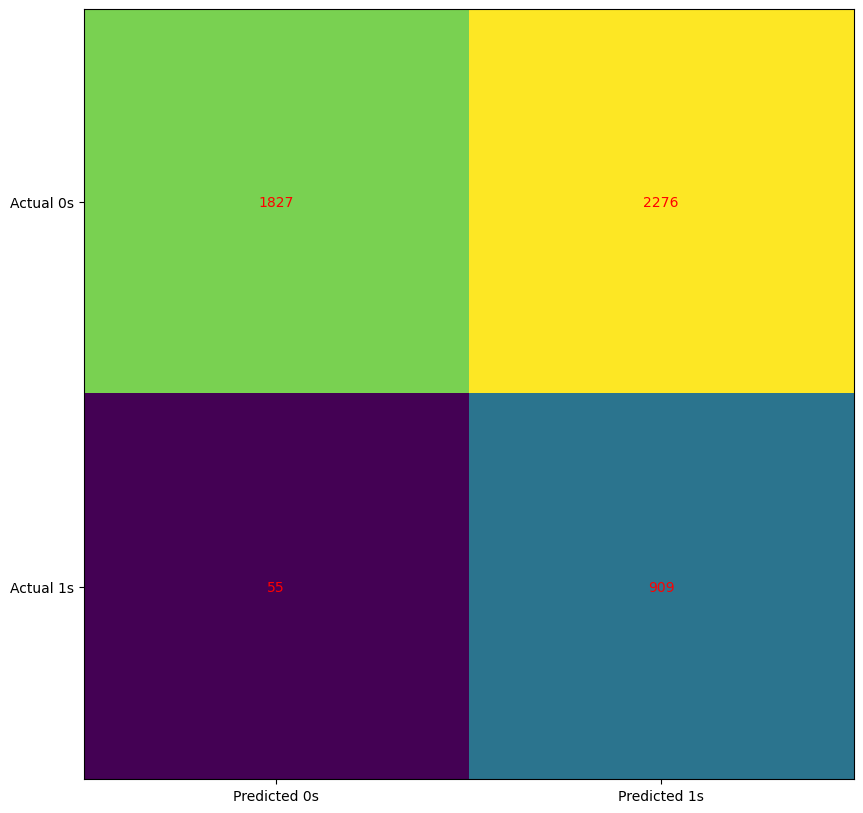

In [162]:
#confusion matrix for df1 in a fancy way
conf_mat1 = confusion_matrix(y_test_1_hot, y_pred1)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(conf_mat1)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat1[i, j], ha='center', va='center', color='red')

plt.show()

In [163]:
#df2
gnb2 = GaussianNB()
gnb2.fit(X_train_2_hot, y_train_2_hot)
y_pred2 = gnb2.predict(X_test_2_hot)

print(classification_report(y_test_2_hot, y_pred2))

              precision    recall  f1-score   support

       <=50K       0.96      0.47      0.63      4103
        >50K       0.29      0.92      0.44       964

    accuracy                           0.55      5067
   macro avg       0.62      0.69      0.53      5067
weighted avg       0.83      0.55      0.59      5067



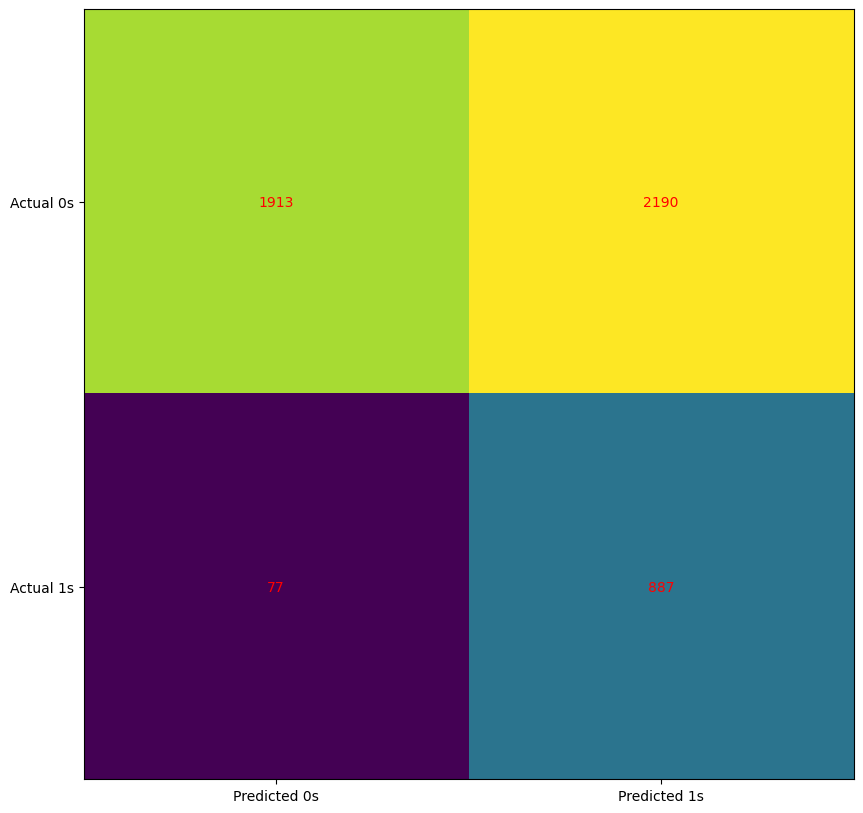

In [164]:
#confusion matrix for df2 in a fancy way
conf_mat2 = confusion_matrix(y_test_2_hot, y_pred2)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(conf_mat2)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat2[i, j], ha='center', va='center', color='red')

plt.show()

In [73]:
#df3 is the same as df2, remember to delete it and just keep df1 and df2

NB is not working very well, the accuracy is pretty low.

We can now test what happens if we add laplace smoothing:

In [168]:
from sklearn.naive_bayes import MultinomialNB
#import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [169]:
#df1
table = pd.DataFrame(columns=['alpha', 'precision'])

for alpha in [0.1, 1, 10, 100, 1000]:
    mnb1 = MultinomialNB(alpha=alpha)
    mnb1.fit(X_train_1_hot, y_train_1_hot)
    y_pred1 = mnb1.predict(X_test_1_hot)
    table = table.append({'alpha': alpha, 'precision': precision_score(y_test_1_hot, y_pred1, average='weighted')}, ignore_index=True)    

/tmp/ipykernel_8051/3439677026.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'alpha': alpha, 'precision': precision_score(y_test_1_hot, y_pred1, average='weighted')}, ignore_index=True)
/tmp/ipykernel_8051/3439677026.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'alpha': alpha, 'precision': precision_score(y_test_1_hot, y_pred1, average='weighted')}, ignore_index=True)
/tmp/ipykernel_8051/3439677026.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'alpha': alpha, 'precision': precision_score(y_test_1_hot, y_pred1, average='weighted')}, ignore_index=True)
/tmp/ipykernel_8051/3439677026.py:8: FutureWarning: The frame.append method is deprecated a

In [170]:
# get the best alpha
best_alpha = table.loc[table['precision'].idxmax()]

mnb1 = MultinomialNB(alpha=best_alpha['alpha'])
mnb1.fit(X_train_1_hot, y_train_1_hot)
y_pred1 = mnb1.predict(X_test_1_hot)

print(classification_report(y_test_1_hot, y_pred1))

              precision    recall  f1-score   support

       <=50K       0.93      0.78      0.85      4103
        >50K       0.45      0.76      0.57       964

    accuracy                           0.78      5067
   macro avg       0.69      0.77      0.71      5067
weighted avg       0.84      0.78      0.80      5067



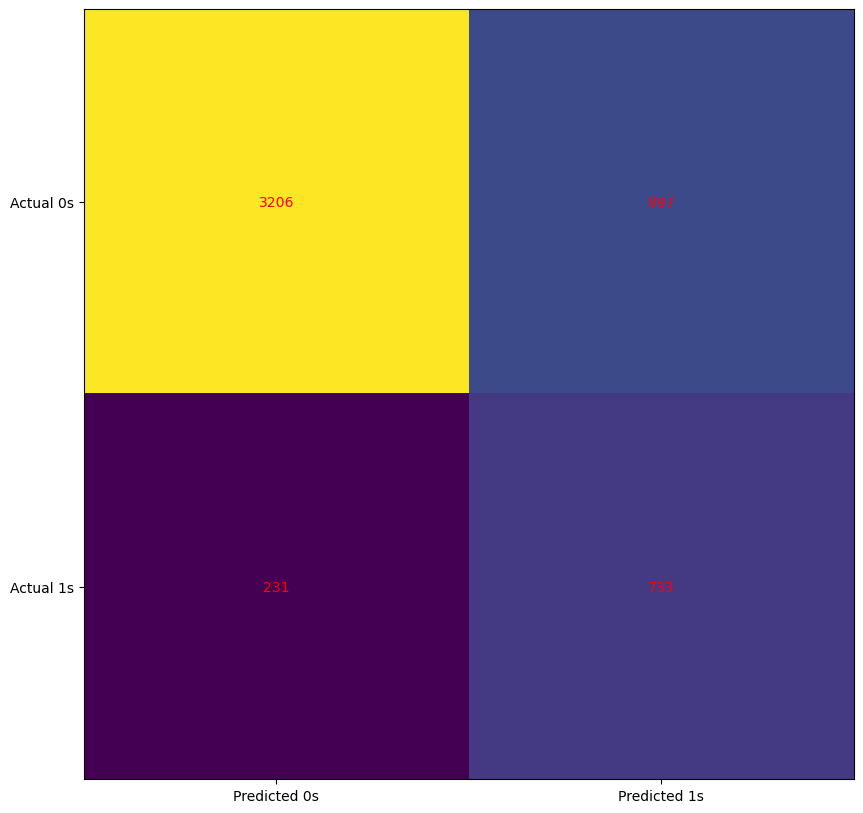

In [171]:
# show the confusion matrix for df1
conf_mat1 = confusion_matrix(y_test_1_hot, y_pred1)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(conf_mat1)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat1[i, j], ha='center', va='center', color='red')

plt.show()

The results are much better, but the decision tree is still better.

We can now move to more complex models, like random forest.

4. Random forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [77]:
#df1
table = pd.DataFrame(columns=['n_estimators', 'max_depth', 'accuracy'])

for n in [10, 100, 500]:
    for d in [2, 5, 10, 20, 50]:
        rf1 = RandomForestClassifier(n_estimators=n, max_depth=d)
        rf1.fit(X_train_1_hot, y_train_1_hot)
        y_pred1 = rf1.predict(X_test_1_hot)
        print('n_estimators = {}, max_depth = {}'.format(n, d))
        print(classification_report(y_test_1_hot, y_pred1))
        table = table.append({'n_estimators': n, 'max_depth': d, 'accuracy': accuracy_score(y_test_1_hot, y_pred1)}, ignore_index=True)

n_estimators = 10, max_depth = 2
              precision    recall  f1-score   support

       <=50K       0.80      1.00      0.89      4207
        >50K       0.00      0.00      0.00      1033

    accuracy                           0.80      5240
   macro avg       0.40      0.50      0.45      5240
weighted avg       0.64      0.80      0.72      5240

n_estimators = 10, max_depth = 5


/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_8051/2241165100.py:11: Futur

              precision    recall  f1-score   support

       <=50K       0.84      0.98      0.91      4207
        >50K       0.78      0.22      0.35      1033

    accuracy                           0.83      5240
   macro avg       0.81      0.60      0.63      5240
weighted avg       0.83      0.83      0.80      5240

n_estimators = 10, max_depth = 10


/tmp/ipykernel_8051/2241165100.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'n_estimators': n, 'max_depth': d, 'accuracy': accuracy_score(y_test_1_hot, y_pred1)}, ignore_index=True)


              precision    recall  f1-score   support

       <=50K       0.87      0.97      0.91      4207
        >50K       0.74      0.40      0.52      1033

    accuracy                           0.85      5240
   macro avg       0.80      0.68      0.72      5240
weighted avg       0.84      0.85      0.84      5240

n_estimators = 10, max_depth = 20


/tmp/ipykernel_8051/2241165100.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'n_estimators': n, 'max_depth': d, 'accuracy': accuracy_score(y_test_1_hot, y_pred1)}, ignore_index=True)


              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      4207
        >50K       0.65      0.46      0.54      1033

    accuracy                           0.85      5240
   macro avg       0.76      0.70      0.72      5240
weighted avg       0.83      0.85      0.83      5240

n_estimators = 10, max_depth = 50


/tmp/ipykernel_8051/2241165100.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'n_estimators': n, 'max_depth': d, 'accuracy': accuracy_score(y_test_1_hot, y_pred1)}, ignore_index=True)


              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      4207
        >50K       0.60      0.46      0.52      1033

    accuracy                           0.83      5240
   macro avg       0.74      0.69      0.71      5240
weighted avg       0.82      0.83      0.82      5240



/tmp/ipykernel_8051/2241165100.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'n_estimators': n, 'max_depth': d, 'accuracy': accuracy_score(y_test_1_hot, y_pred1)}, ignore_index=True)


n_estimators = 100, max_depth = 2
              precision    recall  f1-score   support

       <=50K       0.80      1.00      0.89      4207
        >50K       0.00      0.00      0.00      1033

    accuracy                           0.80      5240
   macro avg       0.40      0.50      0.45      5240
weighted avg       0.64      0.80      0.72      5240



/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_8051/2241165100.py:11: Futur

n_estimators = 100, max_depth = 5
              precision    recall  f1-score   support

       <=50K       0.84      0.98      0.91      4207
        >50K       0.78      0.25      0.38      1033

    accuracy                           0.84      5240
   macro avg       0.81      0.62      0.64      5240
weighted avg       0.83      0.84      0.80      5240



/tmp/ipykernel_8051/2241165100.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'n_estimators': n, 'max_depth': d, 'accuracy': accuracy_score(y_test_1_hot, y_pred1)}, ignore_index=True)


n_estimators = 100, max_depth = 10
              precision    recall  f1-score   support

       <=50K       0.86      0.97      0.91      4207
        >50K       0.73      0.39      0.51      1033

    accuracy                           0.85      5240
   macro avg       0.80      0.68      0.71      5240
weighted avg       0.84      0.85      0.83      5240



/tmp/ipykernel_8051/2241165100.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'n_estimators': n, 'max_depth': d, 'accuracy': accuracy_score(y_test_1_hot, y_pred1)}, ignore_index=True)


n_estimators = 100, max_depth = 20
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      4207
        >50K       0.67      0.49      0.57      1033

    accuracy                           0.85      5240
   macro avg       0.78      0.72      0.74      5240
weighted avg       0.84      0.85      0.84      5240



/tmp/ipykernel_8051/2241165100.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'n_estimators': n, 'max_depth': d, 'accuracy': accuracy_score(y_test_1_hot, y_pred1)}, ignore_index=True)


n_estimators = 100, max_depth = 50
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      4207
        >50K       0.59      0.49      0.54      1033

    accuracy                           0.83      5240
   macro avg       0.73      0.70      0.72      5240
weighted avg       0.82      0.83      0.83      5240



/tmp/ipykernel_8051/2241165100.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'n_estimators': n, 'max_depth': d, 'accuracy': accuracy_score(y_test_1_hot, y_pred1)}, ignore_index=True)


n_estimators = 500, max_depth = 2
              precision    recall  f1-score   support

       <=50K       0.80      1.00      0.89      4207
        >50K       0.00      0.00      0.00      1033

    accuracy                           0.80      5240
   macro avg       0.40      0.50      0.45      5240
weighted avg       0.64      0.80      0.72      5240



/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_8051/2241165100.py:11: Futur

n_estimators = 500, max_depth = 5
              precision    recall  f1-score   support

       <=50K       0.84      0.99      0.91      4207
        >50K       0.80      0.21      0.33      1033

    accuracy                           0.83      5240
   macro avg       0.82      0.60      0.62      5240
weighted avg       0.83      0.83      0.79      5240



/tmp/ipykernel_8051/2241165100.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'n_estimators': n, 'max_depth': d, 'accuracy': accuracy_score(y_test_1_hot, y_pred1)}, ignore_index=True)


n_estimators = 500, max_depth = 10
              precision    recall  f1-score   support

       <=50K       0.87      0.96      0.91      4207
        >50K       0.73      0.39      0.51      1033

    accuracy                           0.85      5240
   macro avg       0.80      0.68      0.71      5240
weighted avg       0.84      0.85      0.83      5240



/tmp/ipykernel_8051/2241165100.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'n_estimators': n, 'max_depth': d, 'accuracy': accuracy_score(y_test_1_hot, y_pred1)}, ignore_index=True)


n_estimators = 500, max_depth = 20
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      4207
        >50K       0.69      0.50      0.58      1033

    accuracy                           0.86      5240
   macro avg       0.79      0.72      0.75      5240
weighted avg       0.85      0.86      0.85      5240



/tmp/ipykernel_8051/2241165100.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'n_estimators': n, 'max_depth': d, 'accuracy': accuracy_score(y_test_1_hot, y_pred1)}, ignore_index=True)


n_estimators = 500, max_depth = 50
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      4207
        >50K       0.60      0.49      0.54      1033

    accuracy                           0.83      5240
   macro avg       0.74      0.70      0.72      5240
weighted avg       0.82      0.83      0.83      5240



/tmp/ipykernel_8051/2241165100.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'n_estimators': n, 'max_depth': d, 'accuracy': accuracy_score(y_test_1_hot, y_pred1)}, ignore_index=True)


In [78]:
table

,n_estimators,max_depth,accuracy
0,10.0,2.0,0.802863
1,10.0,5.0,0.834351
2,10.0,10.0,0.853435
3,10.0,20.0,0.845038
4,10.0,50.0,0.833015
5,100.0,2.0,0.802863
6,100.0,5.0,0.838550
7,100.0,10.0,0.851336
8,100.0,20.0,0.852099
9,100.0,50.0,0.832061


In [79]:
best_n = table.loc[table['accuracy'].idxmax()]['n_estimators']
best_d = table.loc[table['accuracy'].idxmax()]['max_depth']
best_accuracy = table.loc[table['accuracy'].idxmax()]['accuracy']

print('Best n_estimators = {}, max_depth = {}, accuracy = {}'.format(best_n, best_d, best_accuracy))

Best n_estimators = 500.0, max_depth = 20.0, accuracy = 0.85706106870229


TODO: the best value is obtained with the highest values... this might indicate that:

1- the model is overfitting, or

2- the model is not complex enough

Nonetheless, we can see how the improvement from the model (100,20) to the (500,20) is not very big, so this can mean that from that point on, the improve is not very big, and thus, we can stop there.

This model is the best so far, but we can try to improve it with gradient boosting.

5. Gradient boosting

In [80]:
from sklearn.ensemble import AdaBoostClassifier

In [81]:
#df1
table = pd.DataFrame(columns=['n_estimators', 'learning_rate', 'accuracy'])

for n in [10, 100, 500]:
    for l in [0.01, 0.1, 1, 10]:
        ada1 = AdaBoostClassifier(n_estimators=n, learning_rate=l)
        ada1.fit(X_train_1_hot, y_train_1_hot)
        y_pred1 = ada1.predict(X_test_1_hot)
        print('n_estimators = {}, learning_rate = {}'.format(n, l))
        print(classification_report(y_test_1_hot, y_pred1))
        table = table.append({'n_estimators': n, 'learning_rate': l, 'accuracy': accuracy_score(y_test_1_hot, y_pred1)}, ignore_index=True)

n_estimators = 10, learning_rate = 0.01
              precision    recall  f1-score   support

       <=50K       0.80      1.00      0.89      4207
        >50K       0.00      0.00      0.00      1033

    accuracy                           0.80      5240
   macro avg       0.40      0.50      0.45      5240
weighted avg       0.64      0.80      0.72      5240



/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_8051/694279473.py:11: Future

n_estimators = 10, learning_rate = 0.1
              precision    recall  f1-score   support

       <=50K       0.80      1.00      0.89      4207
        >50K       0.00      0.00      0.00      1033

    accuracy                           0.80      5240
   macro avg       0.40      0.50      0.45      5240
weighted avg       0.64      0.80      0.72      5240



/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_8051/694279473.py:11: Future

n_estimators = 10, learning_rate = 1
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4207
        >50K       0.61      0.47      0.53      1033

    accuracy                           0.84      5240
   macro avg       0.74      0.70      0.72      5240
weighted avg       0.82      0.84      0.83      5240



/tmp/ipykernel_8051/694279473.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'n_estimators': n, 'learning_rate': l, 'accuracy': accuracy_score(y_test_1_hot, y_pred1)}, ignore_index=True)


n_estimators = 10, learning_rate = 10
              precision    recall  f1-score   support

       <=50K       0.61      0.34      0.44      4207
        >50K       0.05      0.13      0.07      1033

    accuracy                           0.30      5240
   macro avg       0.33      0.24      0.25      5240
weighted avg       0.50      0.30      0.36      5240



/tmp/ipykernel_8051/694279473.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'n_estimators': n, 'learning_rate': l, 'accuracy': accuracy_score(y_test_1_hot, y_pred1)}, ignore_index=True)


n_estimators = 100, learning_rate = 0.01
              precision    recall  f1-score   support

       <=50K       0.80      1.00      0.89      4207
        >50K       0.00      0.00      0.00      1033

    accuracy                           0.80      5240
   macro avg       0.40      0.50      0.45      5240
weighted avg       0.64      0.80      0.72      5240



/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_8051/694279473.py:11: Future

n_estimators = 100, learning_rate = 0.1
              precision    recall  f1-score   support

       <=50K       0.86      0.96      0.91      4207
        >50K       0.70      0.38      0.49      1033

    accuracy                           0.85      5240
   macro avg       0.78      0.67      0.70      5240
weighted avg       0.83      0.85      0.83      5240



/tmp/ipykernel_8051/694279473.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'n_estimators': n, 'learning_rate': l, 'accuracy': accuracy_score(y_test_1_hot, y_pred1)}, ignore_index=True)


n_estimators = 100, learning_rate = 1
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      4207
        >50K       0.67      0.50      0.57      1033

    accuracy                           0.85      5240
   macro avg       0.77      0.72      0.74      5240
weighted avg       0.84      0.85      0.84      5240



/tmp/ipykernel_8051/694279473.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'n_estimators': n, 'learning_rate': l, 'accuracy': accuracy_score(y_test_1_hot, y_pred1)}, ignore_index=True)


n_estimators = 100, learning_rate = 10
              precision    recall  f1-score   support

       <=50K       0.80      1.00      0.89      4207
        >50K       0.00      0.00      0.00      1033

    accuracy                           0.80      5240
   macro avg       0.40      0.50      0.45      5240
weighted avg       0.64      0.80      0.72      5240



/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_8051/694279473.py:11: Future

n_estimators = 500, learning_rate = 0.01
              precision    recall  f1-score   support

       <=50K       0.86      0.97      0.91      4207
        >50K       0.73      0.34      0.47      1033

    accuracy                           0.85      5240
   macro avg       0.79      0.66      0.69      5240
weighted avg       0.83      0.85      0.82      5240



/tmp/ipykernel_8051/694279473.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'n_estimators': n, 'learning_rate': l, 'accuracy': accuracy_score(y_test_1_hot, y_pred1)}, ignore_index=True)


n_estimators = 500, learning_rate = 0.1
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      4207
        >50K       0.68      0.48      0.56      1033

    accuracy                           0.85      5240
   macro avg       0.78      0.71      0.74      5240
weighted avg       0.84      0.85      0.84      5240



/tmp/ipykernel_8051/694279473.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'n_estimators': n, 'learning_rate': l, 'accuracy': accuracy_score(y_test_1_hot, y_pred1)}, ignore_index=True)


n_estimators = 500, learning_rate = 1
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      4207
        >50K       0.66      0.51      0.58      1033

    accuracy                           0.85      5240
   macro avg       0.77      0.72      0.74      5240
weighted avg       0.84      0.85      0.84      5240



/tmp/ipykernel_8051/694279473.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'n_estimators': n, 'learning_rate': l, 'accuracy': accuracy_score(y_test_1_hot, y_pred1)}, ignore_index=True)


n_estimators = 500, learning_rate = 10
              precision    recall  f1-score   support

       <=50K       0.80      1.00      0.89      4207
        >50K       0.00      0.00      0.00      1033

    accuracy                           0.80      5240
   macro avg       0.40      0.50      0.45      5240
weighted avg       0.64      0.80      0.72      5240



/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_8051/694279473.py:11: Future

In [82]:
table

,n_estimators,learning_rate,accuracy
0,10.0,0.01,0.802863
1,10.0,0.10,0.802863
2,10.0,1.00,0.836832
3,10.0,10.00,0.298282
4,100.0,0.01,0.802863
5,100.0,0.10,0.845420
6,100.0,1.00,0.851527
7,100.0,10.00,0.802863
8,500.0,0.01,0.845802
9,500.0,0.10,0.852290


In [83]:
print('Best n_estimators = {}, learning_rate = {}, accuracy = {}'.format(table.loc[table['accuracy'].idxmax()]['n_estimators'], table.loc[table['accuracy'].idxmax()]['learning_rate'], table.loc[table['accuracy'].idxmax()]['accuracy']))

Best n_estimators = 500.0, learning_rate = 0.1, accuracy = 0.8522900763358778


6. Neural network

In [84]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import StandardScaler

2023-05-11 11:46:28.924176: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-11 11:46:29.069221: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-11 11:46:29.070096: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-11 11:46:29.978572: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#TODO: the split, when a concrete method needs specific preprocessing, should be done in the training set, but not in the test set. This is because the test set is supposed to be unseen data, and thus, we should not preprocess it in a different way than the training set.

In [85]:
#df1
scaler = StandardScaler()
X_train_1_sc = scaler.fit_transform(X_train_1_hot)
y_train_1_sc = y_train_1.map({'>50K': 1, '<=50K': 0})
np.random.seed(0)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_1_sc.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Use 'categorical_crossentropy' for multi-class problems

# Train the model
model.fit(X_train_1_sc, y_train_1_sc, epochs=50, batch_size=32, validation_split=0.2)

X_test_1_sc = scaler.transform(X_test_1_hot)
y_test_1_sc = y_test_1.map({'>50K': 1, '<=50K': 0})

# Make predictions on the testing data
y_pred = (model.predict(X_test_1_sc) > 0.5).astype('int32')  # Use 'np.argmax(model.predict(X_test), axis=-1)' for multi-class problems

# Calculate the classification report and confusion matrix
print(classification_report(y_test_1_sc, y_pred))
print(confusion_matrix(y_test_1_sc, y_pred))

Epoch 1/50


2023-05-11 11:46:30.816870: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: jose-ROG-Strix-G513QM-G513QM
2023-05-11 11:46:30.816885: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: jose-ROG-Strix-G513QM-G513QM
2023-05-11 11:46:30.816989: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2023-05-11 11:46:30.817009: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 510.108.3


524/524 [==============================] - 1s 1ms/step - loss: 0.3447 - accuracy: 0.8382 - val_loss: 0.3398 - val_accuracy: 0.8399
Epoch 2/50
524/524 [==============================] - 0s 857us/step - loss: 0.3140 - accuracy: 0.8531 - val_loss: 0.3416 - val_accuracy: 0.8406
Epoch 3/50
524/524 [==============================] - 0s 826us/step - loss: 0.3065 - accuracy: 0.8551 - val_loss: 0.3482 - val_accuracy: 0.8392
Epoch 4/50
524/524 [==============================] - 0s 884us/step - loss: 0.3035 - accuracy: 0.8588 - val_loss: 0.3421 - val_accuracy: 0.8418
Epoch 5/50
524/524 [==============================] - 1s 971us/step - loss: 0.2999 - accuracy: 0.8610 - val_loss: 0.3430 - val_accuracy: 0.8433
Epoch 6/50
524/524 [==============================] - 0s 944us/step - loss: 0.2971 - accuracy: 0.8607 - val_loss: 0.3436 - val_accuracy: 0.8406
Epoch 7/50
524/524 [==============================] - 0s 856us/step - loss: 0.2946 - accuracy: 0.8618 - val_loss: 0.3386 - val_accuracy: 0.8440
Epoch

In [86]:
print('Accuracy = {}'.format(accuracy_score(y_test_1_sc, y_pred)))

Accuracy = 0.8473282442748091


In [87]:
X_test_1_sc

array([[ 1.47831163e+00, -3.96683870e-01,  2.65443330e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.01801012e+00,  4.67295246e-03, -1.72072491e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.51364820e+00, -1.19939752e+00, -2.14141320e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.32487779e+00,  1.20874342e+00,  4.92615006e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.64576282e-01, -3.96683870e-01, -2.06247066e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.27557851e-01, -2.40346798e+00, -8.79348329e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [88]:
y_test_1_sc

8956     0
13357    1
24853    0
12083    1
22619    0
        ..
15826    0
18861    0
26638    0
16413    0
25854    0
Name: class, Length: 5240, dtype: int64

In [158]:
X_test_1_reset = X_test_1.reset_index(drop=True)
y_test_1_sc_reset = y_test_1_sc.reset_index(drop=True)
male_ppl_idx = X_test_1_reset[X_test_1_reset['sex']=='Male'].index
X_test_1_male = X_test_1_sc[male_ppl_idx]

female_ppl_idx = X_test_1_reset[X_test_1_reset['sex']=='Female'].index
X_test_1_female = X_test_1_sc[female_ppl_idx]

y_test_1_male = y_test_1_sc_reset[male_ppl_idx]
y_test_1_female = y_test_1_sc_reset[female_ppl_idx]

# Make predictions on the testing data
y_pred_male = (model.predict(X_test_1_male) > 0.5).astype('int32')
y_pred_female = (model.predict(X_test_1_female) > 0.5).astype('int32')

# Calculate the classification report and confusion matrix
print('Male ppl')
print(classification_report(y_test_1_male, y_pred_male))
print(confusion_matrix(y_test_1_male, y_pred_male))
print('Accuracy = {}'.format(accuracy_score(y_test_1_male, y_pred_male)))

print('Female ppl')
print(classification_report(y_test_1_female, y_pred_female))
print(confusion_matrix(y_test_1_female, y_pred_female))
print('Accuracy = {}'.format(accuracy_score(y_test_1_female, y_pred_female)))

2023-05-11 12:52:47.090093: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: Matrix size-incompatible: In[0]: [32,87], In[1]: [102,64]
	 [[{{node sequential_18/dense_53/Relu}}]]


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_18/dense_53/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/jose/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/jose/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 985, in launch_instance
      app.start()
    File "/home/jose/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/home/jose/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/jose/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/jose/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/jose/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/jose/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/home/jose/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/home/jose/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/jose/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "/home/jose/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "/home/jose/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/jose/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/jose/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/jose/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_8051/1612648582.py", line 13, in <module>
      y_pred_male = (model.predict(X_test_1_male) > 0.5).astype('int32')
    File "/home/jose/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/jose/.local/lib/python3.10/site-packages/keras/engine/training.py", line 2382, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/home/jose/.local/lib/python3.10/site-packages/keras/engine/training.py", line 2169, in predict_function
      return step_function(self, iterator)
    File "/home/jose/.local/lib/python3.10/site-packages/keras/engine/training.py", line 2155, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/jose/.local/lib/python3.10/site-packages/keras/engine/training.py", line 2143, in run_step
      outputs = model.predict_step(data)
    File "/home/jose/.local/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in predict_step
      return self(x, training=False)
    File "/home/jose/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/jose/.local/lib/python3.10/site-packages/keras/engine/training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/jose/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/jose/.local/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/jose/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/jose/.local/lib/python3.10/site-packages/keras/engine/sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "/home/jose/.local/lib/python3.10/site-packages/keras/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/jose/.local/lib/python3.10/site-packages/keras/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/jose/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/jose/.local/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/jose/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/jose/.local/lib/python3.10/site-packages/keras/layers/core/dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "/home/jose/.local/lib/python3.10/site-packages/keras/activations.py", line 317, in relu
      return backend.relu(
    File "/home/jose/.local/lib/python3.10/site-packages/keras/backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential_18/dense_53/Relu'
Matrix size-incompatible: In[0]: [32,87], In[1]: [102,64]
	 [[{{node sequential_18/dense_53/Relu}}]] [Op:__inference_predict_function_1138333]

Let's compare different architectures:

In [90]:
architectures = [[16],[32],[64],[16,16],[32,32],[64,64],[16,16,16],[32,32,32],[64,64,64]]
table = pd.DataFrame(columns=['architecture', 'accuracy'])

for arch in architectures:
    model = Sequential()
    model.add(Dense(arch[0], activation='relu', input_dim=X_train_1_sc.shape[1]))
    for i in range(1, len(arch)):
        model.add(Dense(arch[i], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_1_sc, y_train_1_sc, epochs=20, batch_size=32, validation_split=0.2)
    y_pred = (model.predict(X_test_1_sc) > 0.5).astype('int32')
    table = table.append({'architecture': arch, 'accuracy': accuracy_score(y_test_1_sc, y_pred)}, ignore_index=True)

Epoch 1/20
524/524 [==============================] - 1s 919us/step - loss: 0.4074 - accuracy: 0.8070 - val_loss: 0.3484 - val_accuracy: 0.8383
Epoch 2/20
524/524 [==============================] - 0s 816us/step - loss: 0.3224 - accuracy: 0.8515 - val_loss: 0.3412 - val_accuracy: 0.8411
Epoch 3/20
524/524 [==============================] - 0s 844us/step - loss: 0.3160 - accuracy: 0.8529 - val_loss: 0.3398 - val_accuracy: 0.8411
Epoch 4/20
524/524 [==============================] - 0s 815us/step - loss: 0.3134 - accuracy: 0.8549 - val_loss: 0.3419 - val_accuracy: 0.8426
Epoch 5/20
524/524 [==============================] - 0s 784us/step - loss: 0.3113 - accuracy: 0.8555 - val_loss: 0.3409 - val_accuracy: 0.8418
Epoch 6/20
524/524 [==============================] - 0s 763us/step - loss: 0.3096 - accuracy: 0.8568 - val_loss: 0.3422 - val_accuracy: 0.8406
Epoch 7/20
524/524 [==============================] - 0s 772us/step - loss: 0.3082 - accuracy: 0.8576 - val_loss: 0.3414 - val_accuracy:

/tmp/ipykernel_8051/736296044.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'architecture': arch, 'accuracy': accuracy_score(y_test_1_sc, y_pred)}, ignore_index=True)


524/524 [==============================] - 1s 933us/step - loss: 0.3575 - accuracy: 0.8358 - val_loss: 0.3404 - val_accuracy: 0.8380
Epoch 2/20
524/524 [==============================] - 0s 798us/step - loss: 0.3167 - accuracy: 0.8515 - val_loss: 0.3400 - val_accuracy: 0.8411
Epoch 3/20
524/524 [==============================] - 0s 824us/step - loss: 0.3110 - accuracy: 0.8540 - val_loss: 0.3390 - val_accuracy: 0.8442
Epoch 4/20
524/524 [==============================] - 0s 827us/step - loss: 0.3086 - accuracy: 0.8562 - val_loss: 0.3378 - val_accuracy: 0.8428
Epoch 5/20
524/524 [==============================] - 0s 820us/step - loss: 0.3053 - accuracy: 0.8575 - val_loss: 0.3394 - val_accuracy: 0.8433
Epoch 6/20
524/524 [==============================] - 0s 843us/step - loss: 0.3037 - accuracy: 0.8586 - val_loss: 0.3357 - val_accuracy: 0.8416
Epoch 7/20
524/524 [==============================] - 0s 839us/step - loss: 0.3023 - accuracy: 0.8592 - val_loss: 0.3370 - val_accuracy: 0.8461
Epo

/tmp/ipykernel_8051/736296044.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'architecture': arch, 'accuracy': accuracy_score(y_test_1_sc, y_pred)}, ignore_index=True)


524/524 [==============================] - 1s 1ms/step - loss: 0.3429 - accuracy: 0.8429 - val_loss: 0.3416 - val_accuracy: 0.8414
Epoch 2/20
524/524 [==============================] - 0s 854us/step - loss: 0.3147 - accuracy: 0.8533 - val_loss: 0.3370 - val_accuracy: 0.8404
Epoch 3/20
524/524 [==============================] - 0s 836us/step - loss: 0.3086 - accuracy: 0.8565 - val_loss: 0.3345 - val_accuracy: 0.8442
Epoch 4/20
524/524 [==============================] - 0s 867us/step - loss: 0.3045 - accuracy: 0.8586 - val_loss: 0.3342 - val_accuracy: 0.8440
Epoch 5/20
524/524 [==============================] - 0s 823us/step - loss: 0.3017 - accuracy: 0.8577 - val_loss: 0.3370 - val_accuracy: 0.8430
Epoch 6/20
524/524 [==============================] - 0s 933us/step - loss: 0.3000 - accuracy: 0.8604 - val_loss: 0.3346 - val_accuracy: 0.8454
Epoch 7/20
524/524 [==============================] - 1s 983us/step - loss: 0.2972 - accuracy: 0.8608 - val_loss: 0.3349 - val_accuracy: 0.8473
Epoch

/tmp/ipykernel_8051/736296044.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'architecture': arch, 'accuracy': accuracy_score(y_test_1_sc, y_pred)}, ignore_index=True)


524/524 [==============================] - 1s 953us/step - loss: 0.4155 - accuracy: 0.7910 - val_loss: 0.3496 - val_accuracy: 0.8378
Epoch 2/20
524/524 [==============================] - 0s 802us/step - loss: 0.3242 - accuracy: 0.8503 - val_loss: 0.3427 - val_accuracy: 0.8406
Epoch 3/20
524/524 [==============================] - 0s 834us/step - loss: 0.3166 - accuracy: 0.8516 - val_loss: 0.3441 - val_accuracy: 0.8378
Epoch 4/20
524/524 [==============================] - 0s 869us/step - loss: 0.3128 - accuracy: 0.8527 - val_loss: 0.3413 - val_accuracy: 0.8406
Epoch 5/20
524/524 [==============================] - 0s 827us/step - loss: 0.3101 - accuracy: 0.8551 - val_loss: 0.3398 - val_accuracy: 0.8406
Epoch 6/20
524/524 [==============================] - 0s 857us/step - loss: 0.3079 - accuracy: 0.8564 - val_loss: 0.3397 - val_accuracy: 0.8406
Epoch 7/20
524/524 [==============================] - 0s 874us/step - loss: 0.3061 - accuracy: 0.8582 - val_loss: 0.3394 - val_accuracy: 0.8416
Epo

/tmp/ipykernel_8051/736296044.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'architecture': arch, 'accuracy': accuracy_score(y_test_1_sc, y_pred)}, ignore_index=True)


524/524 [==============================] - 1s 933us/step - loss: 0.3587 - accuracy: 0.8362 - val_loss: 0.3412 - val_accuracy: 0.8390
Epoch 2/20
524/524 [==============================] - 0s 851us/step - loss: 0.3175 - accuracy: 0.8509 - val_loss: 0.3375 - val_accuracy: 0.8359
Epoch 3/20
524/524 [==============================] - 0s 851us/step - loss: 0.3112 - accuracy: 0.8549 - val_loss: 0.3388 - val_accuracy: 0.8402
Epoch 4/20
524/524 [==============================] - 0s 861us/step - loss: 0.3068 - accuracy: 0.8573 - val_loss: 0.3380 - val_accuracy: 0.8380
Epoch 5/20
524/524 [==============================] - 0s 877us/step - loss: 0.3034 - accuracy: 0.8585 - val_loss: 0.3403 - val_accuracy: 0.8416
Epoch 6/20
524/524 [==============================] - 0s 856us/step - loss: 0.3016 - accuracy: 0.8586 - val_loss: 0.3370 - val_accuracy: 0.8416
Epoch 7/20
524/524 [==============================] - 0s 841us/step - loss: 0.2986 - accuracy: 0.8617 - val_loss: 0.3370 - val_accuracy: 0.8418
Epo

/tmp/ipykernel_8051/736296044.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'architecture': arch, 'accuracy': accuracy_score(y_test_1_sc, y_pred)}, ignore_index=True)


524/524 [==============================] - 1s 955us/step - loss: 0.3514 - accuracy: 0.8342 - val_loss: 0.3397 - val_accuracy: 0.8387
Epoch 2/20
524/524 [==============================] - 0s 890us/step - loss: 0.3132 - accuracy: 0.8518 - val_loss: 0.3386 - val_accuracy: 0.8406
Epoch 3/20
524/524 [==============================] - 0s 905us/step - loss: 0.3069 - accuracy: 0.8546 - val_loss: 0.3390 - val_accuracy: 0.8418
Epoch 4/20
524/524 [==============================] - 0s 912us/step - loss: 0.3028 - accuracy: 0.8592 - val_loss: 0.3352 - val_accuracy: 0.8452
Epoch 5/20
524/524 [==============================] - 0s 890us/step - loss: 0.2979 - accuracy: 0.8613 - val_loss: 0.3448 - val_accuracy: 0.8423
Epoch 6/20
524/524 [==============================] - 0s 944us/step - loss: 0.2952 - accuracy: 0.8644 - val_loss: 0.3442 - val_accuracy: 0.8449
Epoch 7/20
524/524 [==============================] - 1s 983us/step - loss: 0.2931 - accuracy: 0.8635 - val_loss: 0.3442 - val_accuracy: 0.8459
Epo

/tmp/ipykernel_8051/736296044.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'architecture': arch, 'accuracy': accuracy_score(y_test_1_sc, y_pred)}, ignore_index=True)


524/524 [==============================] - 1s 978us/step - loss: 0.3815 - accuracy: 0.8264 - val_loss: 0.3478 - val_accuracy: 0.8390
Epoch 2/20
524/524 [==============================] - 0s 862us/step - loss: 0.3213 - accuracy: 0.8492 - val_loss: 0.3444 - val_accuracy: 0.8342
Epoch 3/20
524/524 [==============================] - 0s 873us/step - loss: 0.3156 - accuracy: 0.8508 - val_loss: 0.3395 - val_accuracy: 0.8371
Epoch 4/20
524/524 [==============================] - 0s 889us/step - loss: 0.3115 - accuracy: 0.8528 - val_loss: 0.3407 - val_accuracy: 0.8378
Epoch 5/20
524/524 [==============================] - 0s 855us/step - loss: 0.3087 - accuracy: 0.8546 - val_loss: 0.3428 - val_accuracy: 0.8371
Epoch 6/20
524/524 [==============================] - 0s 852us/step - loss: 0.3059 - accuracy: 0.8551 - val_loss: 0.3389 - val_accuracy: 0.8406
Epoch 7/20
524/524 [==============================] - 0s 852us/step - loss: 0.3047 - accuracy: 0.8588 - val_loss: 0.3378 - val_accuracy: 0.8409
Epo

/tmp/ipykernel_8051/736296044.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'architecture': arch, 'accuracy': accuracy_score(y_test_1_sc, y_pred)}, ignore_index=True)


Epoch 1/20
524/524 [==============================] - 1s 962us/step - loss: 0.3630 - accuracy: 0.8307 - val_loss: 0.3459 - val_accuracy: 0.8342
Epoch 2/20
524/524 [==============================] - 0s 829us/step - loss: 0.3185 - accuracy: 0.8496 - val_loss: 0.3390 - val_accuracy: 0.8359
Epoch 3/20
524/524 [==============================] - 0s 860us/step - loss: 0.3115 - accuracy: 0.8530 - val_loss: 0.3390 - val_accuracy: 0.8426
Epoch 4/20
524/524 [==============================] - 0s 844us/step - loss: 0.3079 - accuracy: 0.8551 - val_loss: 0.3380 - val_accuracy: 0.8402
Epoch 5/20
524/524 [==============================] - 0s 861us/step - loss: 0.3042 - accuracy: 0.8562 - val_loss: 0.3377 - val_accuracy: 0.8390
Epoch 6/20
524/524 [==============================] - 0s 849us/step - loss: 0.3012 - accuracy: 0.8595 - val_loss: 0.3380 - val_accuracy: 0.8392
Epoch 7/20
524/524 [==============================] - 0s 840us/step - loss: 0.2987 - accuracy: 0.8605 - val_loss: 0.3418 - val_accuracy:

/tmp/ipykernel_8051/736296044.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'architecture': arch, 'accuracy': accuracy_score(y_test_1_sc, y_pred)}, ignore_index=True)


524/524 [==============================] - 1s 993us/step - loss: 0.3444 - accuracy: 0.8419 - val_loss: 0.3422 - val_accuracy: 0.8354
Epoch 2/20
524/524 [==============================] - 0s 900us/step - loss: 0.3150 - accuracy: 0.8530 - val_loss: 0.3394 - val_accuracy: 0.8435
Epoch 3/20
524/524 [==============================] - 0s 897us/step - loss: 0.3069 - accuracy: 0.8573 - val_loss: 0.3413 - val_accuracy: 0.8409
Epoch 4/20
524/524 [==============================] - 0s 870us/step - loss: 0.3022 - accuracy: 0.8598 - val_loss: 0.3471 - val_accuracy: 0.8373
Epoch 5/20
524/524 [==============================] - 0s 880us/step - loss: 0.2997 - accuracy: 0.8605 - val_loss: 0.3473 - val_accuracy: 0.8457
Epoch 6/20
524/524 [==============================] - 0s 869us/step - loss: 0.2962 - accuracy: 0.8610 - val_loss: 0.3412 - val_accuracy: 0.8449
Epoch 7/20
524/524 [==============================] - 0s 883us/step - loss: 0.2929 - accuracy: 0.8638 - val_loss: 0.3403 - val_accuracy: 0.8452
Epo

/tmp/ipykernel_8051/736296044.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'architecture': arch, 'accuracy': accuracy_score(y_test_1_sc, y_pred)}, ignore_index=True)


In [91]:
table

,architecture,accuracy
0,[16],0.850954
1,[32],0.855725
2,[64],0.853053
3,"[16, 16]",0.849809
4,"[32, 32]",0.851145
5,"[64, 64]",0.848473
6,"[16, 16, 16]",0.848855
7,"[32, 32, 32]",0.848473
8,"[64, 64, 64]",0.844084


In [92]:
#df3
scaler = StandardScaler()
df3_feat = scaler.fit_transform(df3_hot.drop(['class'], axis=1))
df3_class = df3['class'].map({'>50K': 1, '<=50K': 0})
np.random.seed(0)
X_train_3_sc, X_test_3_sc, y_train_3_sc, y_test_3_sc = train_test_split(df3_feat, df3_class, test_size=0.2, random_state=42)

table2 = pd.DataFrame(columns=['architecture', 'accuracy'])

for arch in architectures:
    model = Sequential()
    model.add(Dense(arch[0], activation='relu', input_dim=X_train_3_sc.shape[1]))
    for i in range(1, len(arch)):
        model.add(Dense(arch[i], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_3_sc, y_train_3_sc, epochs=20, batch_size=32, validation_split=0.2)
    y_pred = (model.predict(X_test_3_sc) > 0.5).astype('int32')
    table2 = table2.append({'architecture': arch, 'accuracy': accuracy_score(y_test_3_sc, y_pred)}, ignore_index=True)

Epoch 1/20
524/524 [==============================] - 1s 905us/step - loss: 0.3766 - accuracy: 0.8309 - val_loss: 0.3431 - val_accuracy: 0.8399
Epoch 2/20
524/524 [==============================] - 0s 781us/step - loss: 0.3186 - accuracy: 0.8505 - val_loss: 0.3382 - val_accuracy: 0.8395
Epoch 3/20
524/524 [==============================] - 0s 805us/step - loss: 0.3125 - accuracy: 0.8536 - val_loss: 0.3363 - val_accuracy: 0.8411
Epoch 4/20
524/524 [==============================] - 0s 774us/step - loss: 0.3085 - accuracy: 0.8567 - val_loss: 0.3355 - val_accuracy: 0.8416
Epoch 5/20
524/524 [==============================] - 0s 790us/step - loss: 0.3060 - accuracy: 0.8567 - val_loss: 0.3372 - val_accuracy: 0.8433
Epoch 6/20
524/524 [==============================] - 0s 785us/step - loss: 0.3037 - accuracy: 0.8577 - val_loss: 0.3371 - val_accuracy: 0.8445
Epoch 7/20
524/524 [==============================] - 0s 801us/step - loss: 0.3021 - accuracy: 0.8588 - val_loss: 0.3356 - val_accuracy:

/tmp/ipykernel_8051/447898842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table2 = table2.append({'architecture': arch, 'accuracy': accuracy_score(y_test_3_sc, y_pred)}, ignore_index=True)


524/524 [==============================] - 1s 902us/step - loss: 0.3852 - accuracy: 0.8159 - val_loss: 0.3436 - val_accuracy: 0.8399
Epoch 2/20
524/524 [==============================] - 0s 795us/step - loss: 0.3193 - accuracy: 0.8520 - val_loss: 0.3381 - val_accuracy: 0.8395
Epoch 3/20
524/524 [==============================] - 0s 773us/step - loss: 0.3129 - accuracy: 0.8533 - val_loss: 0.3403 - val_accuracy: 0.8397
Epoch 4/20
524/524 [==============================] - 0s 783us/step - loss: 0.3089 - accuracy: 0.8554 - val_loss: 0.3364 - val_accuracy: 0.8411
Epoch 5/20
524/524 [==============================] - 0s 764us/step - loss: 0.3053 - accuracy: 0.8582 - val_loss: 0.3396 - val_accuracy: 0.8426
Epoch 6/20
524/524 [==============================] - 0s 797us/step - loss: 0.3025 - accuracy: 0.8593 - val_loss: 0.3379 - val_accuracy: 0.8385
Epoch 7/20
524/524 [==============================] - 0s 782us/step - loss: 0.2999 - accuracy: 0.8607 - val_loss: 0.3391 - val_accuracy: 0.8406
Epo

/tmp/ipykernel_8051/447898842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table2 = table2.append({'architecture': arch, 'accuracy': accuracy_score(y_test_3_sc, y_pred)}, ignore_index=True)


524/524 [==============================] - 1s 913us/step - loss: 0.3956 - accuracy: 0.8187 - val_loss: 0.3408 - val_accuracy: 0.8387
Epoch 2/20
524/524 [==============================] - 0s 824us/step - loss: 0.3162 - accuracy: 0.8534 - val_loss: 0.3400 - val_accuracy: 0.8399
Epoch 3/20
524/524 [==============================] - 0s 831us/step - loss: 0.3115 - accuracy: 0.8536 - val_loss: 0.3390 - val_accuracy: 0.8416
Epoch 4/20
524/524 [==============================] - 0s 817us/step - loss: 0.3068 - accuracy: 0.8555 - val_loss: 0.3374 - val_accuracy: 0.8449
Epoch 5/20
524/524 [==============================] - 0s 824us/step - loss: 0.3025 - accuracy: 0.8582 - val_loss: 0.3388 - val_accuracy: 0.8447
Epoch 6/20
524/524 [==============================] - 0s 815us/step - loss: 0.2992 - accuracy: 0.8615 - val_loss: 0.3424 - val_accuracy: 0.8390
Epoch 7/20
524/524 [==============================] - 0s 807us/step - loss: 0.2977 - accuracy: 0.8602 - val_loss: 0.3387 - val_accuracy: 0.8428
Epo

/tmp/ipykernel_8051/447898842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table2 = table2.append({'architecture': arch, 'accuracy': accuracy_score(y_test_3_sc, y_pred)}, ignore_index=True)


524/524 [==============================] - 1s 910us/step - loss: 0.3854 - accuracy: 0.8142 - val_loss: 0.3434 - val_accuracy: 0.8356
Epoch 2/20
524/524 [==============================] - 0s 803us/step - loss: 0.3202 - accuracy: 0.8512 - val_loss: 0.3383 - val_accuracy: 0.8364
Epoch 3/20
524/524 [==============================] - 0s 823us/step - loss: 0.3117 - accuracy: 0.8528 - val_loss: 0.3365 - val_accuracy: 0.8383
Epoch 4/20
524/524 [==============================] - 0s 810us/step - loss: 0.3073 - accuracy: 0.8549 - val_loss: 0.3345 - val_accuracy: 0.8435
Epoch 5/20
524/524 [==============================] - 0s 788us/step - loss: 0.3046 - accuracy: 0.8574 - val_loss: 0.3323 - val_accuracy: 0.8426
Epoch 6/20
524/524 [==============================] - 0s 775us/step - loss: 0.3020 - accuracy: 0.8584 - val_loss: 0.3343 - val_accuracy: 0.8399
Epoch 7/20
524/524 [==============================] - 0s 784us/step - loss: 0.3003 - accuracy: 0.8591 - val_loss: 0.3353 - val_accuracy: 0.8418
Epo

/tmp/ipykernel_8051/447898842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table2 = table2.append({'architecture': arch, 'accuracy': accuracy_score(y_test_3_sc, y_pred)}, ignore_index=True)


524/524 [==============================] - 1s 944us/step - loss: 0.3649 - accuracy: 0.8303 - val_loss: 0.3432 - val_accuracy: 0.8368
Epoch 2/20
524/524 [==============================] - 0s 872us/step - loss: 0.3163 - accuracy: 0.8528 - val_loss: 0.3382 - val_accuracy: 0.8378
Epoch 3/20
524/524 [==============================] - 0s 948us/step - loss: 0.3102 - accuracy: 0.8530 - val_loss: 0.3366 - val_accuracy: 0.8414
Epoch 4/20
524/524 [==============================] - 0s 877us/step - loss: 0.3053 - accuracy: 0.8550 - val_loss: 0.3412 - val_accuracy: 0.8392
Epoch 5/20
524/524 [==============================] - 0s 889us/step - loss: 0.3017 - accuracy: 0.8579 - val_loss: 0.3386 - val_accuracy: 0.8395
Epoch 6/20
524/524 [==============================] - 0s 850us/step - loss: 0.2985 - accuracy: 0.8604 - val_loss: 0.3401 - val_accuracy: 0.8449
Epoch 7/20
524/524 [==============================] - 0s 839us/step - loss: 0.2960 - accuracy: 0.8599 - val_loss: 0.3403 - val_accuracy: 0.8411
Epo

/tmp/ipykernel_8051/447898842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table2 = table2.append({'architecture': arch, 'accuracy': accuracy_score(y_test_3_sc, y_pred)}, ignore_index=True)


524/524 [==============================] - 1s 953us/step - loss: 0.3466 - accuracy: 0.8373 - val_loss: 0.3409 - val_accuracy: 0.8404
Epoch 2/20
524/524 [==============================] - 0s 856us/step - loss: 0.3126 - accuracy: 0.8544 - val_loss: 0.3403 - val_accuracy: 0.8409
Epoch 3/20
524/524 [==============================] - 0s 870us/step - loss: 0.3057 - accuracy: 0.8581 - val_loss: 0.3375 - val_accuracy: 0.8440
Epoch 4/20
524/524 [==============================] - 0s 859us/step - loss: 0.2998 - accuracy: 0.8610 - val_loss: 0.3421 - val_accuracy: 0.8378
Epoch 5/20
524/524 [==============================] - 0s 838us/step - loss: 0.2947 - accuracy: 0.8639 - val_loss: 0.3399 - val_accuracy: 0.8409
Epoch 6/20
524/524 [==============================] - 0s 852us/step - loss: 0.2906 - accuracy: 0.8632 - val_loss: 0.3496 - val_accuracy: 0.8442
Epoch 7/20
524/524 [==============================] - 0s 883us/step - loss: 0.2875 - accuracy: 0.8636 - val_loss: 0.3441 - val_accuracy: 0.8428
Epo

/tmp/ipykernel_8051/447898842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table2 = table2.append({'architecture': arch, 'accuracy': accuracy_score(y_test_3_sc, y_pred)}, ignore_index=True)


524/524 [==============================] - 1s 921us/step - loss: 0.3765 - accuracy: 0.8193 - val_loss: 0.3477 - val_accuracy: 0.8375
Epoch 2/20
524/524 [==============================] - 0s 843us/step - loss: 0.3205 - accuracy: 0.8492 - val_loss: 0.3418 - val_accuracy: 0.8395
Epoch 3/20
524/524 [==============================] - 0s 818us/step - loss: 0.3121 - accuracy: 0.8551 - val_loss: 0.3410 - val_accuracy: 0.8397
Epoch 4/20
524/524 [==============================] - 0s 826us/step - loss: 0.3077 - accuracy: 0.8582 - val_loss: 0.3370 - val_accuracy: 0.8387
Epoch 5/20
524/524 [==============================] - 0s 831us/step - loss: 0.3044 - accuracy: 0.8602 - val_loss: 0.3407 - val_accuracy: 0.8371
Epoch 6/20
524/524 [==============================] - 0s 840us/step - loss: 0.3018 - accuracy: 0.8593 - val_loss: 0.3388 - val_accuracy: 0.8428
Epoch 7/20
524/524 [==============================] - 0s 823us/step - loss: 0.2990 - accuracy: 0.8614 - val_loss: 0.3407 - val_accuracy: 0.8399
Epo

/tmp/ipykernel_8051/447898842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table2 = table2.append({'architecture': arch, 'accuracy': accuracy_score(y_test_3_sc, y_pred)}, ignore_index=True)


524/524 [==============================] - 1s 930us/step - loss: 0.3597 - accuracy: 0.8347 - val_loss: 0.3428 - val_accuracy: 0.8337
Epoch 2/20
524/524 [==============================] - 0s 847us/step - loss: 0.3154 - accuracy: 0.8548 - val_loss: 0.3391 - val_accuracy: 0.8342
Epoch 3/20
524/524 [==============================] - 0s 835us/step - loss: 0.3088 - accuracy: 0.8561 - val_loss: 0.3387 - val_accuracy: 0.8354
Epoch 4/20
524/524 [==============================] - 0s 896us/step - loss: 0.3042 - accuracy: 0.8573 - val_loss: 0.3431 - val_accuracy: 0.8392
Epoch 5/20
524/524 [==============================] - 0s 857us/step - loss: 0.3000 - accuracy: 0.8612 - val_loss: 0.3427 - val_accuracy: 0.8387
Epoch 6/20
524/524 [==============================] - 0s 906us/step - loss: 0.2959 - accuracy: 0.8615 - val_loss: 0.3392 - val_accuracy: 0.8380
Epoch 7/20
524/524 [==============================] - 1s 1ms/step - loss: 0.2930 - accuracy: 0.8632 - val_loss: 0.3443 - val_accuracy: 0.8418
Epoch

/tmp/ipykernel_8051/447898842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table2 = table2.append({'architecture': arch, 'accuracy': accuracy_score(y_test_3_sc, y_pred)}, ignore_index=True)


524/524 [==============================] - 1s 1ms/step - loss: 0.3608 - accuracy: 0.8298 - val_loss: 0.3370 - val_accuracy: 0.8390
Epoch 2/20
524/524 [==============================] - 1s 977us/step - loss: 0.3142 - accuracy: 0.8543 - val_loss: 0.3395 - val_accuracy: 0.8414
Epoch 3/20
524/524 [==============================] - 0s 910us/step - loss: 0.3055 - accuracy: 0.8570 - val_loss: 0.3415 - val_accuracy: 0.8373
Epoch 4/20
524/524 [==============================] - 0s 925us/step - loss: 0.2996 - accuracy: 0.8605 - val_loss: 0.3391 - val_accuracy: 0.8399
Epoch 5/20
524/524 [==============================] - 0s 913us/step - loss: 0.2947 - accuracy: 0.8620 - val_loss: 0.3381 - val_accuracy: 0.8435
Epoch 6/20
524/524 [==============================] - 0s 900us/step - loss: 0.2901 - accuracy: 0.8648 - val_loss: 0.3427 - val_accuracy: 0.8449
Epoch 7/20
524/524 [==============================] - 0s 915us/step - loss: 0.2852 - accuracy: 0.8665 - val_loss: 0.3457 - val_accuracy: 0.8428
Epoch

/tmp/ipykernel_8051/447898842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table2 = table2.append({'architecture': arch, 'accuracy': accuracy_score(y_test_3_sc, y_pred)}, ignore_index=True)


In [93]:
table2

,architecture,accuracy
0,[16],0.851908
1,[32],0.847710
2,[64],0.850382
3,"[16, 16]",0.845038
4,"[32, 32]",0.847328
5,"[64, 64]",0.837977
6,"[16, 16, 16]",0.846756
7,"[32, 32, 32]",0.843130
8,"[64, 64, 64]",0.839504
